#  __Mortgage Default Project - 1__  

In this notebook, it is presented process of building a model to understand whether 'Fannie Mae Single-Family Loan Performance' data which I pulled via AWS in previous project has enough information to predict those borrowers who are most at risk of defaulting on their mortgage loans.

**Project Goal**
- The purpose of this project is to develop a mortgage default model that will determine the probability of default for a mortgage loan with the information at the time of mortgage origination.  

This notebook was prepared by <a href="https://www.linkedin.com/in/betul-ozkaldi-0580a8273/">Betul Ozkaldi</a>


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [2]:
col_names=['pool_id',
          'loan_id',
          'act_period',
          'channel',
          'seller',
          'servicer',
'master_servicer',
'orig_rate',
'curr_rate',
'orig_upb',
'issuance_upb',
'current_upb',
'orig_term',
'orig_date',
'first_pay',
'loan_age',
'rem_months',
'adj_rem_months',
'matr_dt',
'oltv',
'ocltv',
'num_bo',
'dti',
'cscore_b',
'cscore_c',
'first_flag',
'purpose',
'prop',
'no_units',
'occ_stat',
'state',
'msa',
'zip',
'mi_pct',
'product',
'ppmt_flg',
'io',
'first_pay_io',
'mnths_to_amtz_io',
'dlq_status',
'pmt_history',
'mod_flag',
'mi_cancel_flag',
'zero_bal_code',
'zb_dte',
'last_upb',
'rprch_dte',
'curr_schd_prncpl',
'tot_schd_prncpl',
'unschd_prncpl_curr',
'last_paid_installment_date',
'foreclosure_date',
'disposition_date',
'foreclosure_costs',
'property_preservation_and_repair_costs',
'asset_recovery_costs',
'miscellaneous_holding_expenses_and_credits',
'associated_taxes_for_holding_property',
'net_sales_proceeds',
'credit_enhancement_proceeds',
'repurchases_make_whole_proceeds',
'other_foreclosure_proceeds',
'non_interest_bearing_upb',
'principal_forgiveness_amount',
'original_list_start_date',
'original_list_price',
'current_list_start_date',
'current_list_price',
'issue_scoreb',
'issue_scorec',
'curr_scoreb',
'curr_scorec',
'mi_type',
'serv_ind',
'current_period_modification_loss_amount',
'cumulative_modification_loss_amount',
'current_period_credit_event_net_gain_or_loss',
'cumulative_credit_event_net_gain_or_loss',
'homeready_program_indicator',
'foreclosure_principal_write_off_amount',
'relocation_mortgage_indicator',
'zero_balance_code_change_date',
'loan_holdback_indicator',
'loan_holdback_effective_date',
'delinquent_accrued_interest',
'property_inspection_waiver_indicator',
'high_balance_loan_indicator',
'arm_5_yr_indicator',
'arm_product_type',
'months_until_first_payment_reset',
'months_between_subsequent_payment_reset',
'interest_rate_change_date',
'payment_change_date',
'arm_index',
'arm_cap_structure',
'initial_interest_rate_cap',
'periodic_interest_rate_cap',
'lifetime_interest_rate_cap',
'margin',
'balloon_indicator',
'plan_number',
'forbearance_indicator',
'high_loan_to_value_hltv_refinance_option_indicator',
'deal_name',
're_procs_flag',
'adr_type',
'adr_count',
'adr_upb',
'random',
'threshold']

In [3]:
col_classes=['str',
'str',
'object',
'str',
'str',
'str',
'str',
'float',
'float',
'float',
'float',
'float',
'float',
'str',
'str',
'float',
'float',
'float',
'str',
'float',
'float',
'float',
'float',
'float',
'float',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'str',
'str',
'float',
'str',
'float',
'float',
'float',
'str',
'str',
'str',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'str',
'float',
'str',
'float',
'float',
'float',
'float',
'float',
'str',
'str',
'float',
'float',
'float',
'float',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'float',
'str',
'str',
'str',
'str',
'float',
'float',
'float',
'float',
'str',
'float',
'str',
'str',
'str',
'str',
'str',
'float',
'float',
'float',
'float']

**zip two columns with dictionary**

In [4]:
col_dict = dict(zip(col_names,col_classes))
col_dict

{'pool_id': 'str',
 'loan_id': 'str',
 'act_period': 'object',
 'channel': 'str',
 'seller': 'str',
 'servicer': 'str',
 'master_servicer': 'str',
 'orig_rate': 'float',
 'curr_rate': 'float',
 'orig_upb': 'float',
 'issuance_upb': 'float',
 'current_upb': 'float',
 'orig_term': 'float',
 'orig_date': 'str',
 'first_pay': 'str',
 'loan_age': 'float',
 'rem_months': 'float',
 'adj_rem_months': 'float',
 'matr_dt': 'str',
 'oltv': 'float',
 'ocltv': 'float',
 'num_bo': 'float',
 'dti': 'float',
 'cscore_b': 'float',
 'cscore_c': 'float',
 'first_flag': 'str',
 'purpose': 'str',
 'prop': 'str',
 'no_units': 'float',
 'occ_stat': 'str',
 'state': 'str',
 'msa': 'str',
 'zip': 'str',
 'mi_pct': 'float',
 'product': 'str',
 'ppmt_flg': 'str',
 'io': 'str',
 'first_pay_io': 'str',
 'mnths_to_amtz_io': 'float',
 'dlq_status': 'str',
 'pmt_history': 'str',
 'mod_flag': 'str',
 'mi_cancel_flag': 'str',
 'zero_bal_code': 'str',
 'zb_dte': 'str',
 'last_upb': 'float',
 'rprch_dte': 'str',
 'curr_s

### FNMA Data

In [5]:
df= pd.read_csv('C:/Users/btloz/JupyterNotes/Group_Project/Group_Project_1_small.csv', sep ='|',header =None, names=col_names, dtype=col_dict)
df

pool_id       loan_id  act_period channel  \
298503      NaN  265674961865  2018-02-20       R   
3499937     NaN  747888204871  2020-07-20       R   
5726932     NaN  939243187741  2021-06-20       C   
4467704     NaN  492457754312  2012-12-20       C   
2526422     NaN  000099982734  2021-11-20       R   
...         ...           ...         ...     ...   
5672333     NaN  738606173584  2013-05-20       R   
4375680     NaN  955130074697  2011-02-20       C   
1257100     NaN  000097728198  2021-11-20       C   
3144360     NaN  605309567112  2005-07-20       R   
5422551     NaN  597326080977  2019-07-20       B   

                                            seller  \
298503                      Wells Fargo Bank, N.A.   
3499937                                      Other   
5726932       Truist Bank (formerly SunTrust Bank)   
4467704                         Citimortgage, Inc.   
2526422                                      Other   
...                                            ...   
5672333                                      Other   
4375680                         Citimortgage, Inc.   
1257100                                      Other   
3144360  First Tennessee Bank National Association   
5422551                         Flagstar Bank, Fsb   

                                           servicer master_servicer  \
298503                       Wells Fargo Bank, N.A.             NaN   
3499937                New Residential Mortgage LLC             NaN   
5726932        Truist Bank (formerly SunTrust Bank)             NaN   
4467704                          Citimortgage, Inc.             NaN   
2526422                                       Other             NaN   
...                                             ...             ...   
5672333                                       Other             NaN   
4375680                                       Other             NaN   
1257100                                       Other             NaN   
3144360  First Tennessee Bank, National Association             NaN   
5422551                                       Other             NaN   

         orig_rate  curr_rate  orig_upb  ...  plan_number  \
298503       4.125      4.125  183000.0  ...          NaN   
3499937      4.625      4.625  108000.0  ...          NaN   
5726932      3.375      3.375  417000.0  ...          NaN   
4467704      2.750      2.750  393000.0  ...          NaN   
2526422      3.250      3.250   86000.0  ...          NaN   
...            ...        ...       ...  ...          ...   
5672333      4.125      4.125   56000.0  ...          NaN   
4375680      5.125      2.000  360000.0  ...          NaN   
1257100      3.625      3.625  126000.0  ...          NaN   
3144360      6.250      6.250  164000.0  ...          NaN   
5422551      6.000      4.125  275000.0  ...          NaN   

         forbearance_indicator  \
298503                     NaN   
3499937                      7   
5726932                      N   
4467704                    NaN   
2526422                      7   
...                        ...   
5672333                    NaN   
4375680                    NaN   
1257100                      7   
3144360                    NaN   
5422551                    NaN   

         high_loan_to_value_hltv_refinance_option_indicator deal_name  \
298503                                                   N        NaN   
3499937                                                  N        NaN   
5726932                                                  N        NaN   
4467704                                                  N        NaN   
2526422                                                  N        NaN   
...                                                    ...        ...   
5672333                                                  N        NaN   
4375680                                                  N        NaN   
1257100                                                  N        NaN 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580106 entries, 298503 to 5422551
Columns: 110 entries, pool_id to threshold
dtypes: float64(56), object(54)
memory usage: 491.3+ MB


**Convert the data variables from strings to date**
- In order to do date operations on them

In [7]:
parse_dates=['orig_date','first_pay','zb_dte','act_period','matr_dt']
for i in parse_dates:
    df[i]=pd.to_datetime(df[i])

In [6]:
#df['orig_date']

**Reduce data with most relevant columns**
- The acquisition data contains personal information for each of the borrowers, including an individual’s debt-to-income ratio, credit score, and loan amount, among several other things. The performance data contains information regarding loan payment history, and whether or not a borrower ended up defaulting on their loan

In [8]:
acq_cols=[
'loan_id',
'channel',
'orig_rate',
'orig_upb',
'orig_term',
'orig_date',
'first_pay',
'matr_dt',
'oltv',
'ocltv',
'num_bo',
'dti',
'cscore_b',
'cscore_c',
'first_flag',
'purpose',
'prop',
'no_units',
'occ_stat',
'state',
'msa',
'zip',
'mi_pct',
'product',
'ppmt_flg',
'io',
'first_pay_io',
'mi_type',
'homeready_program_indicator',
'relocation_mortgage_indicator',
'high_balance_loan_indicator',
'arm_5_yr_indicator',
'arm_product_type',
'months_until_first_payment_reset',
'months_between_subsequent_payment_reset',
'arm_index',
'arm_cap_structure',
'initial_interest_rate_cap',
'periodic_interest_rate_cap',
'lifetime_interest_rate_cap',
'margin',
'balloon_indicator',
'plan_number',
'high_loan_to_value_hltv_refinance_option_indicator',
]

In [9]:
perf_cols=[
'act_period',
'loan_age',
'rem_months',
'dlq_status',
'zero_bal_code',
'zb_dte',
]

In [10]:
cols_to_keep=acq_cols+perf_cols
cols_to_drop = [x for x in col_names if x not in cols_to_keep]
len(cols_to_drop)

60

In [11]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [12]:
df.shape

(580106, 50)

In [14]:
df_sample = df
df_sample.shape

(580106, 50)

## Create Target
*Down sample and create termination states (targets)*

- "D" stands for "delinquent." This means the borrower has missed one or more payments on their mortgage loan.
- "P" stands for "paid." This means the borrower has made all of their required mortgage payments on time.
- "A" stands for "active." This means the borrower currently has an active mortgage loan.

Now create two termination states which will be our target variables, by using the performance data and follow the logic below:
- the loan will be default if: 
'zero_bal_code' is equal to one of  ('09','03','02','06','15','16')

or: 
- 'dlq_status' is not one of equal ('00','01','02','03','04','05')

The loan will be prepaid if:
- 'zero_bal_code' is equal to ['01']


In [15]:
def my_logic(row): #target i olusturuyoruz
    if row["zero_bal_code"] in ['09','03','02','06','15','16']:
        return "D"
    elif row["zero_bal_code"] in ['01']:
        return "P"
    elif row["dlq_status"] not in ('00','01','02','03','04','05'):
        return "D"
    else:
        return "A"
df_sample["target"] = df_sample.apply(my_logic, axis=1)

In [16]:
df_sample.groupby(["target"],dropna=False)['loan_id'].count()


target
A    228984
D    180135
P    170987
Name: loan_id, dtype: int64

- Since we don’t want any observation beyond the termination status, delete them from your dataset.

- First we need to create a dataset that finds the minimum of the act_period for each loan where the termination status is either prepay and default and call it the last_period, then left merge with the original dataset and delete any act_period beyond the last_period

## Cleaning  
*Clean the rows*

In [17]:
temp_df = df_sample[df_sample['target']!='A'].groupby(['loan_id']).agg({'act_period': 'min'}). \
reset_index().rename(columns={'act_period':'last_period'})

In [18]:
temp_df

loan_id last_period
0       000097473078  2021-03-20
1       000097473159  2021-06-20
2       000097473417  2021-09-20
3       000097473471  2021-04-20
4       000097473651  2020-11-20
...              ...         ...
328876  999986755734  2003-12-20
328877  999990214356  2008-02-20
328878  999996807189  2016-08-20
328879  999997685687  2012-09-20
328880  999999704568  2013-05-20

[328881 rows x 2 columns]

In [19]:
df_sample = df_sample.merge(temp_df, on='loan_id', how='left')

In [20]:
df_sample.groupby(['target'],dropna=False)['loan_id'].count()

target
A    228984
D    180135
P    170987
Name: loan_id, dtype: int64

In [21]:
df_sample = df_sample.loc[~((df_sample['act_period'] > df_sample['last_period'])),:]

In [22]:
df_sample.columns

Index(['loan_id', 'act_period', 'channel', 'orig_rate', 'orig_upb',
       'orig_term', 'orig_date', 'first_pay', 'loan_age', 'rem_months',
       'matr_dt', 'oltv', 'ocltv', 'num_bo', 'dti', 'cscore_b', 'cscore_c',
       'first_flag', 'purpose', 'prop', 'no_units', 'occ_stat', 'state', 'msa',
       'zip', 'mi_pct', 'product', 'ppmt_flg', 'io', 'first_pay_io',
       'dlq_status', 'zero_bal_code', 'zb_dte', 'mi_type',
       'homeready_program_indicator', 'relocation_mortgage_indicator',
       'high_balance_loan_indicator', 'arm_5_yr_indicator', 'arm_product_type',
       'months_until_first_payment_reset',
       'months_between_subsequent_payment_reset', 'arm_index',
       'arm_cap_structure', 'initial_interest_rate_cap',
       'periodic_interest_rate_cap', 'lifetime_interest_rate_cap', 'margin',
       'balloon_indicator', 'plan_number',
       'high_loan_to_value_hltv_refinance_option_indicator', 'target',
       'last_period'],
      dtype='object')

In [23]:
df_sample.groupby(['target'],dropna=False)['loan_id'].count()

target
A    228695
D    158007
P    170874
Name: loan_id, dtype: int64

**Checking  Missing Values**

In [24]:
#let's see how many row I have now
obs_count=df_sample.shape[0]
obs_count

557576

In [25]:
missings=df_sample.apply(lambda x: (x.isnull().sum())/obs_count, axis=0)

from IPython.display import display, HTML
display(HTML(missings.loc[missings>0].to_frame().to_html()))

In [26]:
# make list the columns which has more than 0.95 missing
cols_majority_miss=missings.loc[missings>0.95].index.tolist()
cols_majority_miss

['first_pay_io',
 'arm_5_yr_indicator',
 'arm_product_type',
 'months_until_first_payment_reset',
 'months_between_subsequent_payment_reset',
 'arm_index',
 'arm_cap_structure',
 'initial_interest_rate_cap',
 'periodic_interest_rate_cap',
 'lifetime_interest_rate_cap',
 'margin',
 'balloon_indicator',
 'plan_number']

In [27]:
df_sample.drop(cols_majority_miss, inplace=True,axis=1) 

In [28]:
df_sample['act_period'] =pd.to_datetime(df_sample['act_period'])
df_sample['act_period'] = df_sample['act_period'].apply(lambda x: x.replace(day=28))
df_sample['calc_age'] = ((df_sample['act_period']-df_sample['orig_date'])/np.timedelta64(1,'M')) 
df_sample['calc_age'] = df_sample['calc_age'].astype(int)+1 
df_sample['age_dif'] = df_sample['calc_age']-df_sample['loan_age']

In [29]:
df_sample.loc[(df_sample['loan_age'].isnull()), 'loan_age'] = df_sample['calc_age'] 
df_sample['calc_age']

0          14
1          83
2          59
3           5
4          19
         ... 
580101     12
580102     68
580103     29
580104     12
580105    201
Name: calc_age, Length: 557576, dtype: int32

In [30]:
df_sample[df_sample['rem_months'].isnull()].groupby(['target'],dropna=False)['loan_id'].count()

target
A        16
D      7069
P    170874
Name: loan_id, dtype: int64

In [31]:
df_sample['calc_rem_months'] = (df_sample['orig_term']- df_sample['loan_age'])
df_sample['calc_rem_months'] = df_sample['calc_rem_months'].astype(int)
df_sample.loc[(df_sample['rem_months'].isnull()), "rem_months"] = df_sample['calc_rem_months']
df_sample['rem_months'].isnull().sum()

0

In [32]:
df_sample.columns

Index(['loan_id', 'act_period', 'channel', 'orig_rate', 'orig_upb',
       'orig_term', 'orig_date', 'first_pay', 'loan_age', 'rem_months',
       'matr_dt', 'oltv', 'ocltv', 'num_bo', 'dti', 'cscore_b', 'cscore_c',
       'first_flag', 'purpose', 'prop', 'no_units', 'occ_stat', 'state', 'msa',
       'zip', 'mi_pct', 'product', 'ppmt_flg', 'io', 'dlq_status',
       'zero_bal_code', 'zb_dte', 'mi_type', 'homeready_program_indicator',
       'relocation_mortgage_indicator', 'high_balance_loan_indicator',
       'high_loan_to_value_hltv_refinance_option_indicator', 'target',
       'last_period', 'calc_age', 'age_dif', 'calc_rem_months'],
      dtype='object')

## Imputation

In [33]:
df['ocltv'].fillna(df['oltv'], inplace=True)
df_sample['ocltv'].isnull().sum()

2509

In [34]:
df_sample.loc[(df_sample['ocltv'].isnull()), "ocltv"] = df_sample['oltv']
df_sample['ocltv'].isnull().sum()

0

In [35]:
df_sample['cscore_b'] = df_sample['cscore_b'].fillna(df_sample['cscore_b'].median())
df_sample['cscore_b'].isnull().sum()

0

In [36]:
df_sample.loc[(df_sample['cscore_c'].isnull()), "cscore_c"] = df_sample['cscore_b']
df_sample['cscore_c'].isnull().sum()

0

In [37]:
df_sample['cscore_min']=df_sample.apply(lambda row : min(row['cscore_b'],row['cscore_c']) ,axis=1)
df_sample['cscore_min'].isnull().sum()

0

In [38]:
missings=df_sample.apply(lambda x: (x.isnull().sum())/obs_count, axis=0)

display(HTML(missings.loc[missings>0].to_frame().to_html()))

**Fill the numerical and categorical columns**

In [39]:
num_cols= list(df_sample.select_dtypes(include= 'number'))
num_cols

['orig_rate',
 'orig_upb',
 'orig_term',
 'loan_age',
 'rem_months',
 'oltv',
 'ocltv',
 'num_bo',
 'dti',
 'cscore_b',
 'cscore_c',
 'no_units',
 'mi_pct',
 'calc_age',
 'age_dif',
 'calc_rem_months',
 'cscore_min']

In [40]:
cat_cols = list(df_sample.select_dtypes(include= 'object'))
cat_cols

['loan_id',
 'channel',
 'first_flag',
 'purpose',
 'prop',
 'occ_stat',
 'state',
 'msa',
 'zip',
 'product',
 'ppmt_flg',
 'io',
 'dlq_status',
 'zero_bal_code',
 'mi_type',
 'homeready_program_indicator',
 'relocation_mortgage_indicator',
 'high_balance_loan_indicator',
 'high_loan_to_value_hltv_refinance_option_indicator',
 'target']

In [41]:
#we filled each columns missing values with non missing values' median
def fill_numerical_values(df,x_var):
    df[x_var] = df[x_var].fillna(df[x_var].median())

In [42]:
#we filled each columns' missing values with the most common value
def fill_cat_values(df,x_var):
    df[x_var] = df[x_var].fillna(df[x_var].value_counts().index[0])

In [43]:
for i in (num_cols):
    fill_numerical_values(df_sample,i)

In [44]:
for i in (cat_cols):
    fill_cat_values(df_sample,i)

In [45]:
missings=df_sample.apply(lambda x: (x.isnull().sum())/obs_count, axis=0)


display(HTML(missings.loc[missings>0].to_frame().to_html()))

In [46]:
df_sample.isnull().mean()

loan_id                                               0.000000
act_period                                            0.000000
channel                                               0.000000
orig_rate                                             0.000000
orig_upb                                              0.000000
orig_term                                             0.000000
orig_date                                             0.000000
first_pay                                             0.000000
loan_age                                              0.000000
rem_months                                            0.000000
matr_dt                                               0.319165
oltv                                                  0.000000
ocltv                                                 0.000000
num_bo                                                0.000000
dti                                                   0.000000
cscore_b                                              0

In [47]:
df_sample['last_period']

0               NaT
1               NaT
2        2021-06-20
3               NaT
4               NaT
            ...    
580101          NaT
580102          NaT
580103          NaT
580104          NaT
580105   2019-07-20
Name: last_period, Length: 557576, dtype: datetime64[ns]

## New Features  
*Create some new derived variables*

In [48]:
df_sample['orig_val']=df_sample['orig_upb']/(df_sample['oltv']/100)

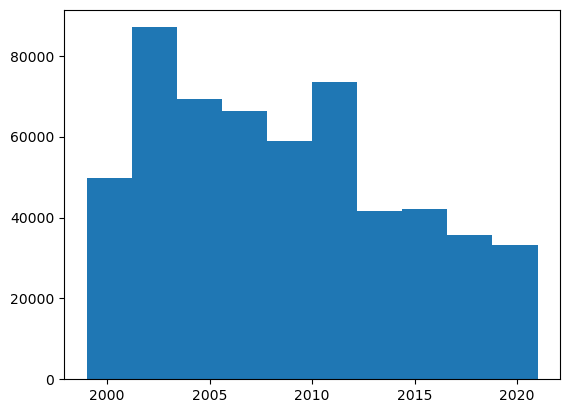

In [49]:
df_sample['Vintage']=df_sample['orig_date'].dt.year
plt.hist(df_sample['Vintage']);

## *Visualization*
- See the relationship between the final column list with target variable

###  Check Outliers

In [50]:
df_sample['num_bo']

0         2.0
1         2.0
2         2.0
3         1.0
4         2.0
         ... 
580101    2.0
580102    2.0
580103    1.0
580104    1.0
580105    2.0
Name: num_bo, Length: 557576, dtype: float64

In [51]:
num_cols

['orig_rate',
 'orig_upb',
 'orig_term',
 'loan_age',
 'rem_months',
 'oltv',
 'ocltv',
 'num_bo',
 'dti',
 'cscore_b',
 'cscore_c',
 'no_units',
 'mi_pct',
 'calc_age',
 'age_dif',
 'calc_rem_months',
 'cscore_min']

-  In following code, I created a final column list for to see the relationship between target variable and columns.

In [52]:
final_num_cols=num_cols+['orig_val']
final_cat_cols=cat_cols+['Vintage']

In [53]:
final_num_cols

['orig_rate',
 'orig_upb',
 'orig_term',
 'loan_age',
 'rem_months',
 'oltv',
 'ocltv',
 'num_bo',
 'dti',
 'cscore_b',
 'cscore_c',
 'no_units',
 'mi_pct',
 'calc_age',
 'age_dif',
 'calc_rem_months',
 'cscore_min',
 'orig_val']

In [54]:
final_cat_cols

['loan_id',
 'channel',
 'first_flag',
 'purpose',
 'prop',
 'occ_stat',
 'state',
 'msa',
 'zip',
 'product',
 'ppmt_flg',
 'io',
 'dlq_status',
 'zero_bal_code',
 'mi_type',
 'homeready_program_indicator',
 'relocation_mortgage_indicator',
 'high_balance_loan_indicator',
 'high_loan_to_value_hltv_refinance_option_indicator',
 'target',
 'Vintage']

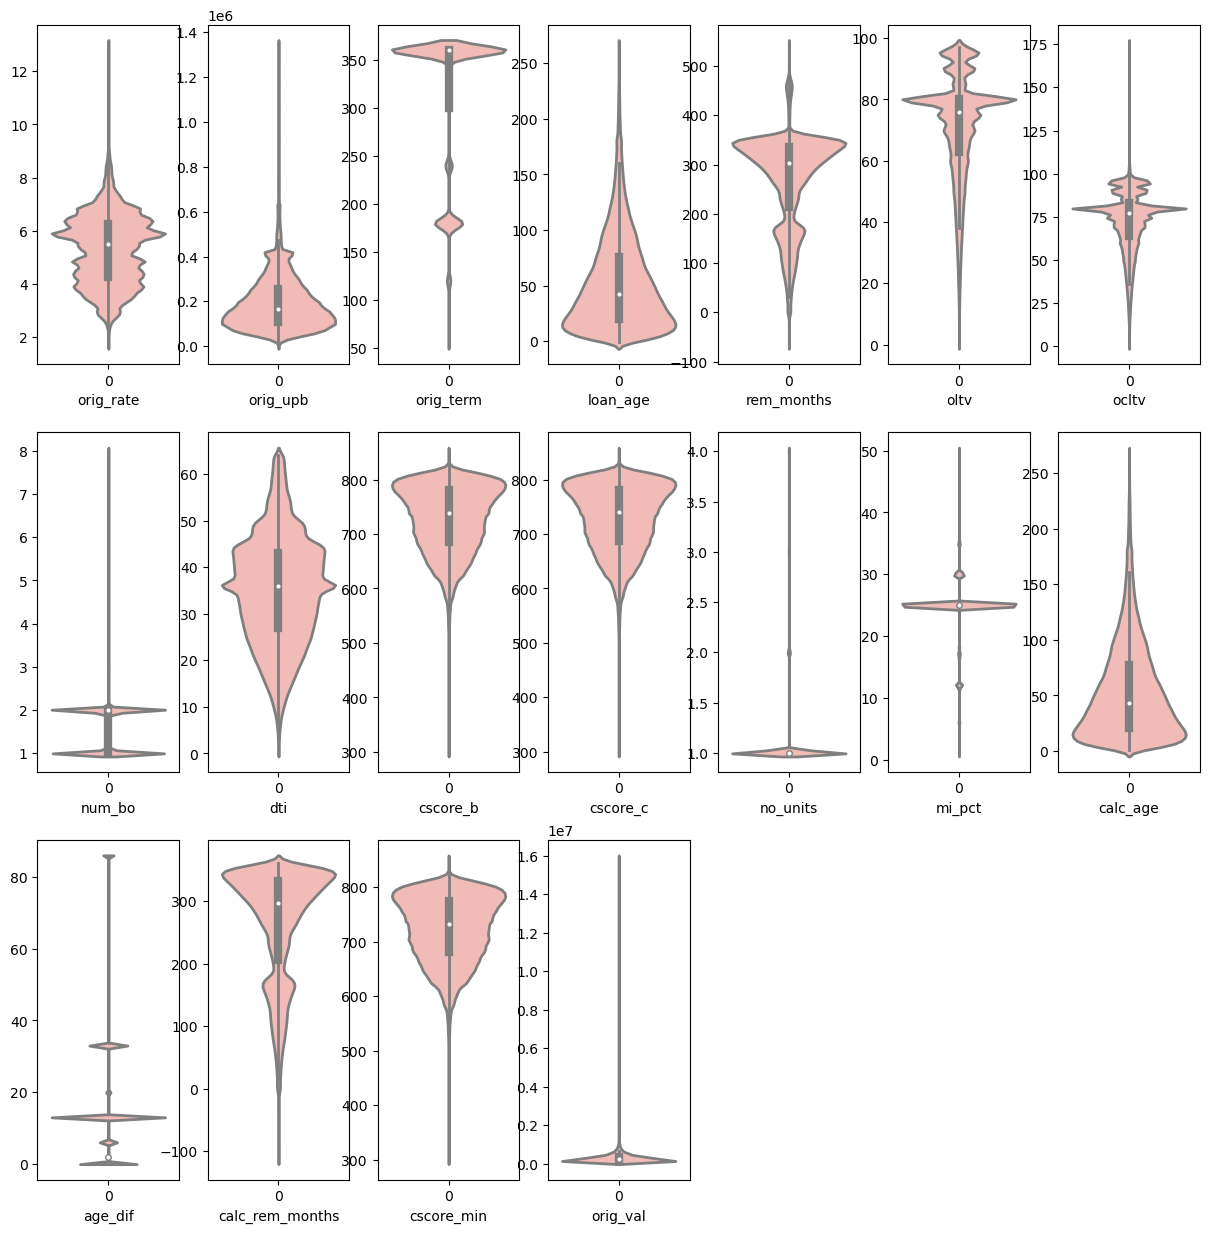

In [58]:
plt.figure(figsize=(15,15))
for i, j in zip(range(1,len(final_num_cols)+1),final_num_cols):
    plt.subplot(3,7,i)
    sns.violinplot(data=df_sample[j],inner="box", palette='Pastel1', cut=2, linewidth=2)
    plt.xlabel(j)

- Observation the relationship with sns.boxplot and see if there is outlier

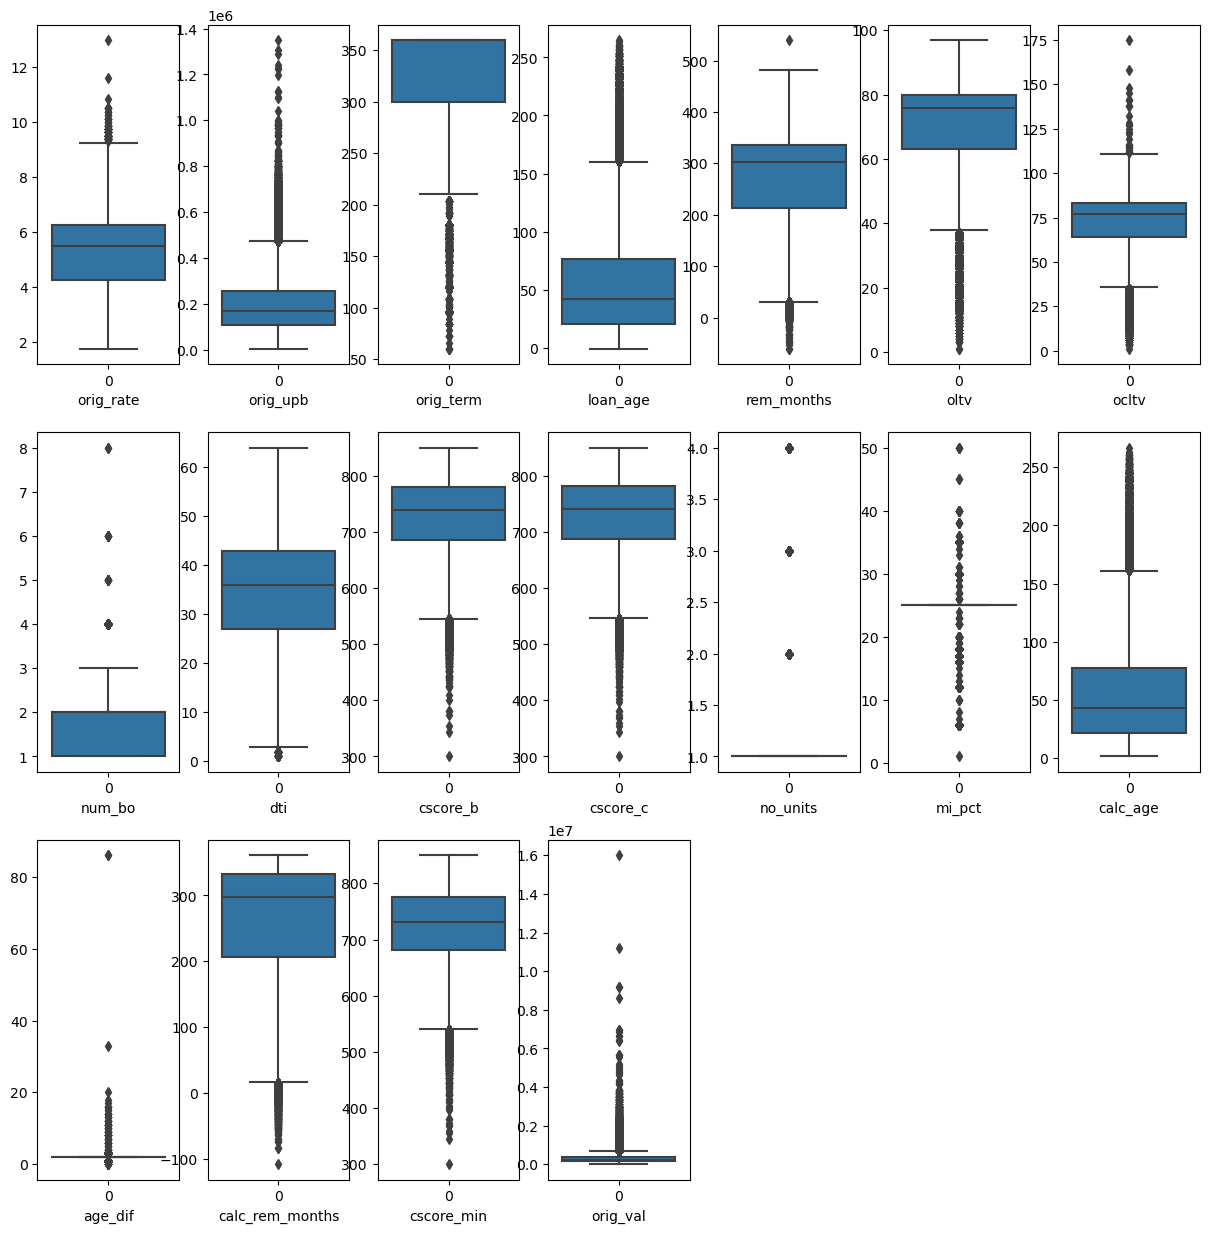

In [59]:
plt.figure(figsize=(15,15))
for i, j in zip(range(1,len(final_num_cols)+1),final_num_cols):
    plt.subplot(3,7,i)
    sns.boxplot(data=df_sample[j])
    plt.xlabel(j)

**Conclusion**: We observe, there are outliers in the all of attributes.

- Let's do cap and floor extreme values by 1 st percentile and 99th percentile of the corresponding column. 


In [60]:
def cap_floor(df,x_val):
    q_l = df[x_val].quantile(0.00)
    q_h = df[x_val].quantile(0.99)

    df.loc[df[x_val]<= q_l, x_val] = q_l
    df.loc[df[x_val]>= q_h, x_val] = q_h

In [61]:
for i in (final_num_cols):
  cap_floor(df_sample,i)

In [62]:
final_num_cols

['orig_rate',
 'orig_upb',
 'orig_term',
 'loan_age',
 'rem_months',
 'oltv',
 'ocltv',
 'num_bo',
 'dti',
 'cscore_b',
 'cscore_c',
 'no_units',
 'mi_pct',
 'calc_age',
 'age_dif',
 'calc_rem_months',
 'cscore_min',
 'orig_val']

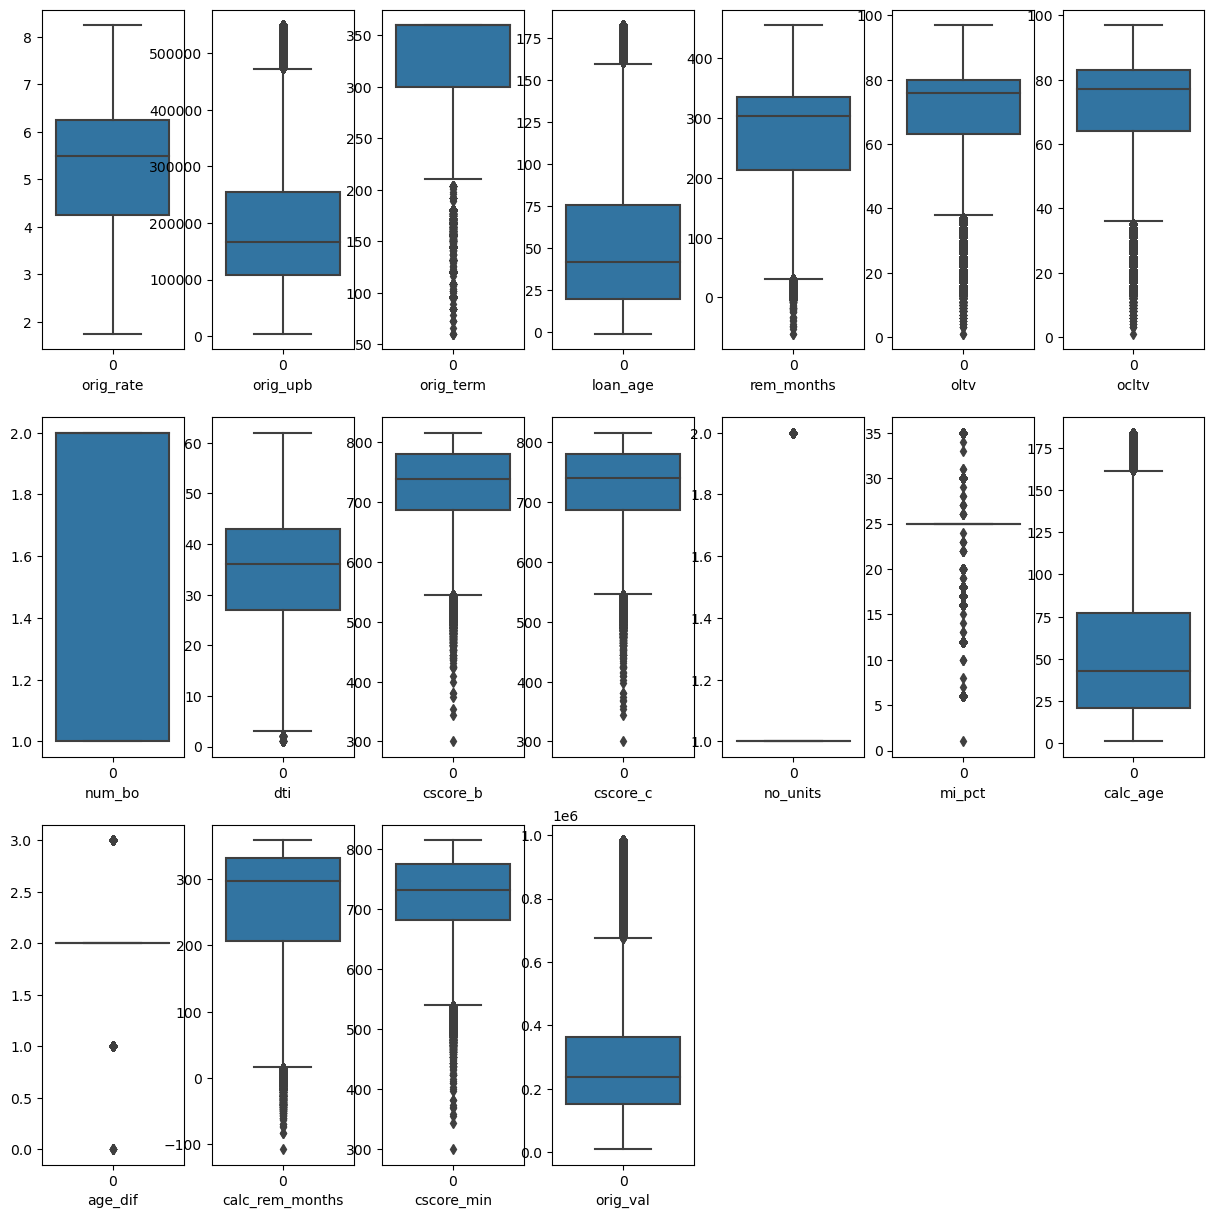

In [63]:
plt.figure(figsize=(15,15))
for i, j in zip(range(1,len(final_num_cols)+1),final_num_cols):
    plt.subplot(3,7,i)
    sns.boxplot(data=df_sample[j])
    plt.xlabel(j)

### Correlation

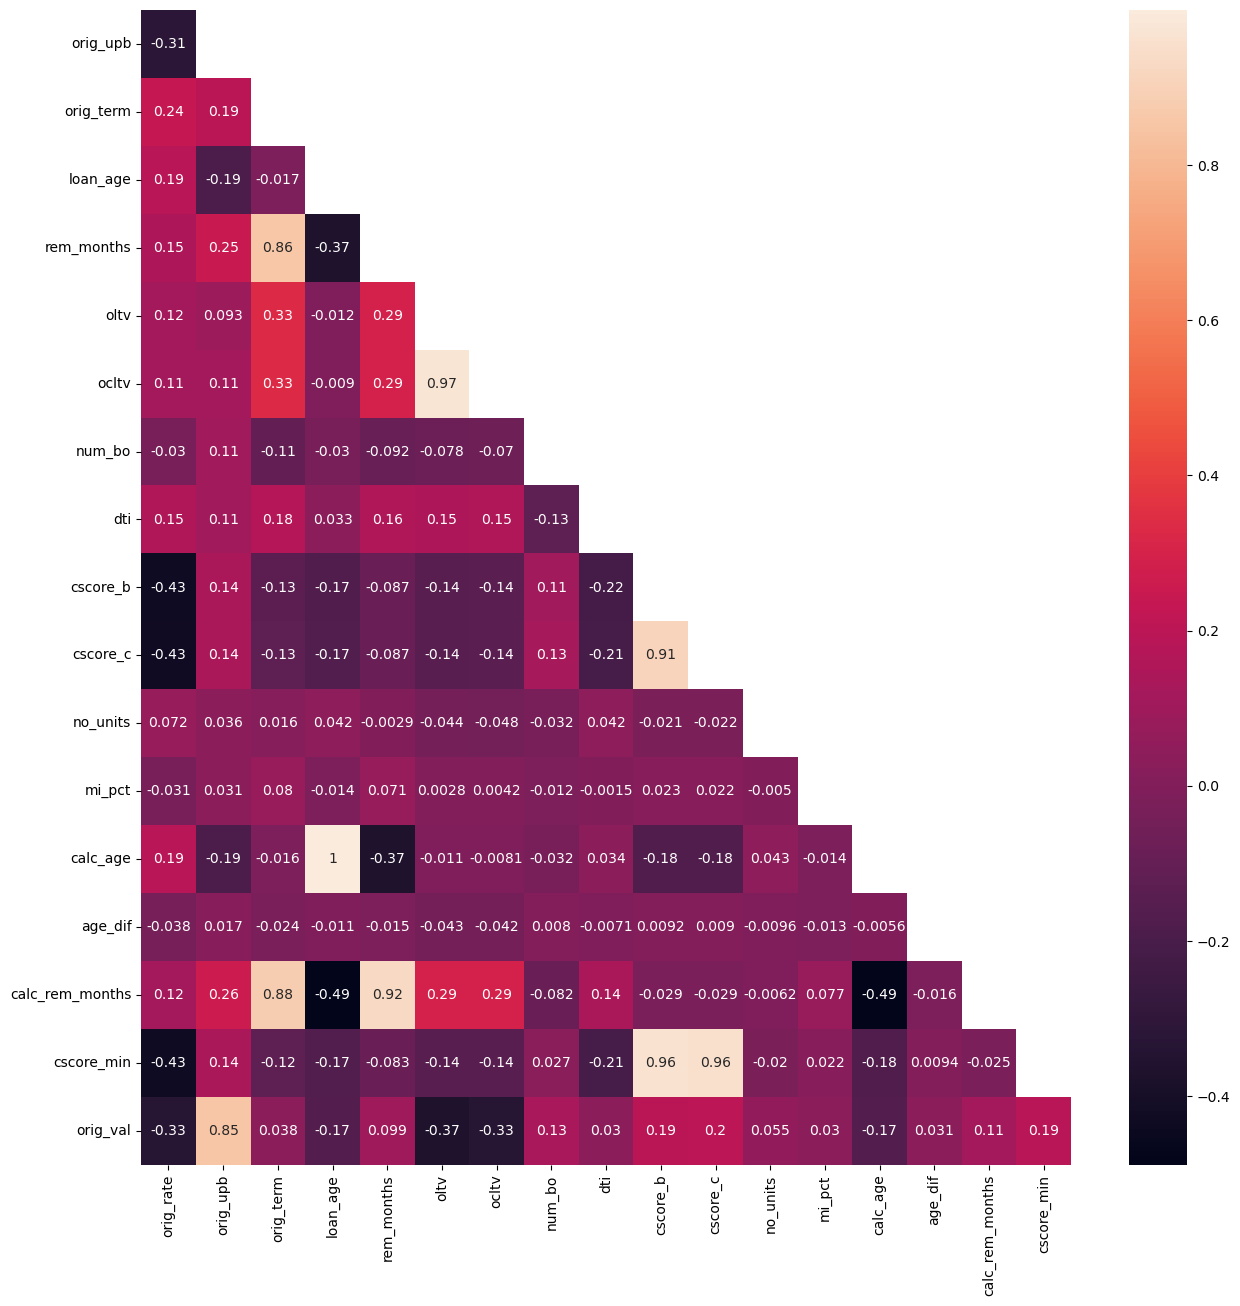

In [64]:
plt.figure(figsize = (15,15))
mask = np.triu(np.ones_like(df_sample[final_num_cols].corr(),dtype=bool))
sns.heatmap(df_sample[final_num_cols].corr().iloc[1:,:-1] ,annot = True, mask=mask[1:,:-1]);

**Conclusion**: - We observe strong positive correlation between:  
loan_age and calc_age  
cscore_b and cscore_min  
cscore_c and cscore_min  
rem_moth and calc_age  
cscore_c and cscore_b  
oclt and oltv  
rem_moth and orig_term


##  Relationships of Variable with the Target

- For each of  the columns , let's create a line plot the average default rate and bar plot for the count of observations

In [65]:
df_sample_ppay=df_sample[df_sample.target!='D']
df_sample_ppay["Prepay"]=df_sample_ppay.apply(lambda row : 1 if row['target']=='P' else 0,axis=1)

In [66]:
df_sample_dflt=df_sample[df_sample.target!='P']
df_sample_dflt["Default"]=df_sample_dflt.apply(lambda row : 1 if row['target']=='D' else 0,axis=1)

In [67]:
df_sample_dflt['Default'].value_counts()

0    228695
1    158007
Name: Default, dtype: int64

**Output Labels**  
**Default : 1**  
**Not Default : 0**

- I have to remove loan_id column from 'final_cat_cols' for to make univariate analysis we will plot numerical and categorical columns with loan_id.

In [68]:
final_cat_cols2 = final_cat_cols.pop(0)
final_cat_cols2

'loan_id'

In [69]:
final_cat_cols

['channel',
 'first_flag',
 'purpose',
 'prop',
 'occ_stat',
 'state',
 'msa',
 'zip',
 'product',
 'ppmt_flg',
 'io',
 'dlq_status',
 'zero_bal_code',
 'mi_type',
 'homeready_program_indicator',
 'relocation_mortgage_indicator',
 'high_balance_loan_indicator',
 'high_loan_to_value_hltv_refinance_option_indicator',
 'target',
 'Vintage']

In [70]:
def univariate_plot(df,x_var,y_var,bin_size):
    if df[x_var].nunique() > 10:
        s=df.groupby([pd.cut(df[x_var],bins=bin_size)]).mean() [y_var]
        s.plot()
        plt.xticks(rotation=45)
        plt.show()
    else:
        s=df.groupby(df[x_var]).mean()[y_var]   
        s.plot(kind='bar')
        plt.xticks(rotation=45)
        plt.show()

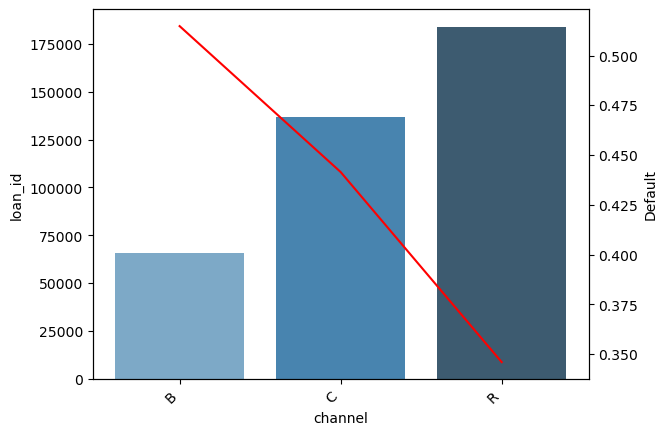

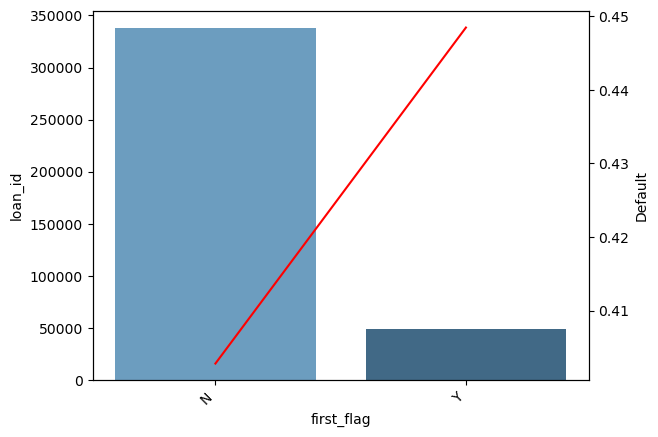

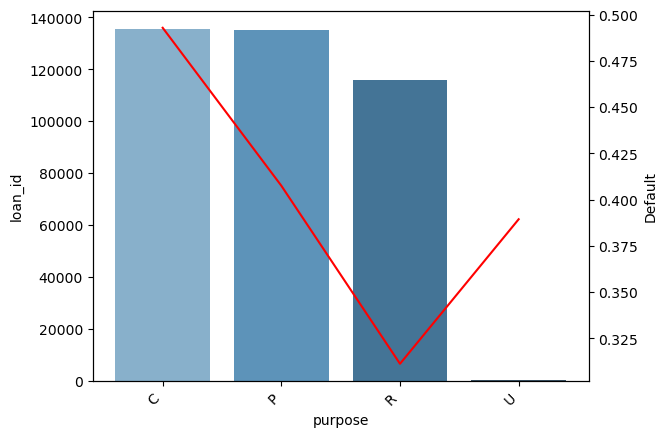

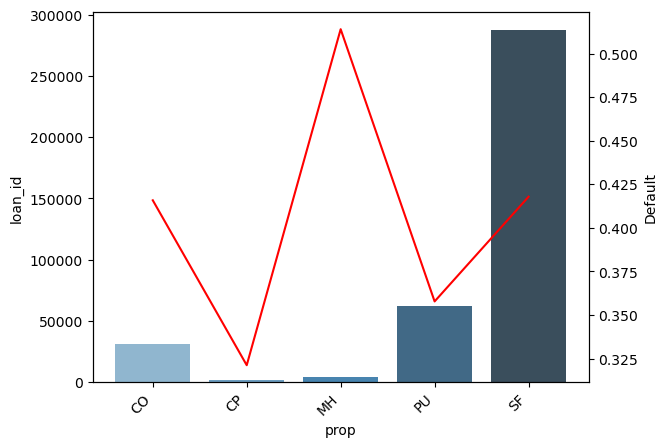

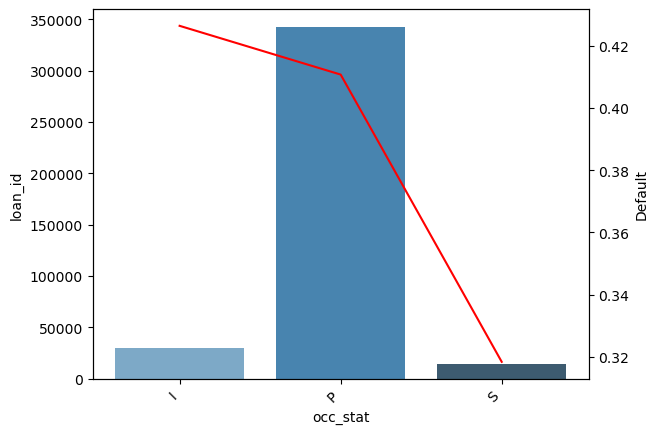

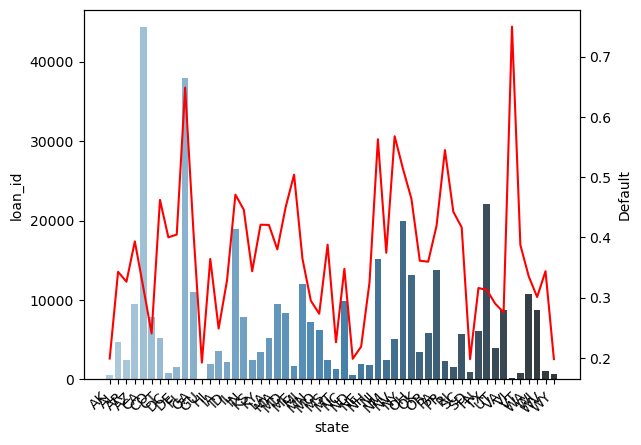

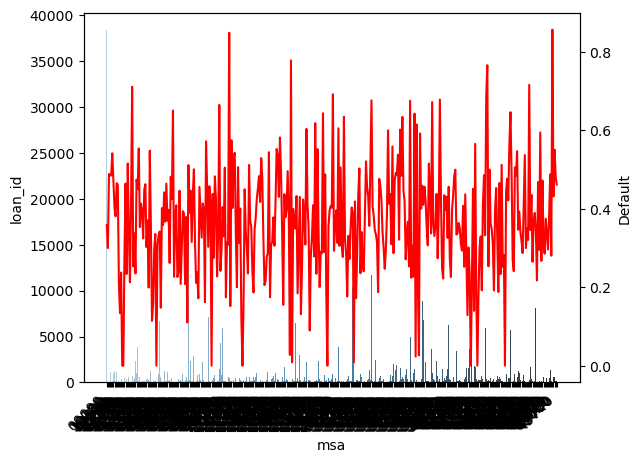

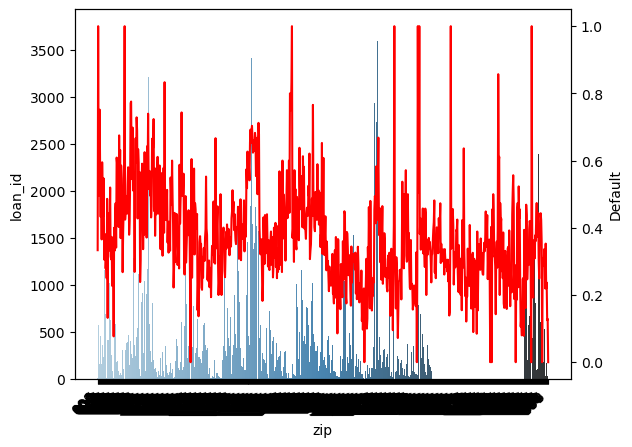

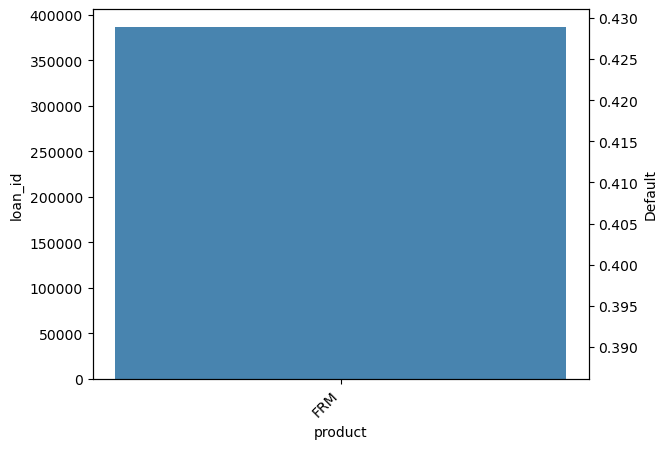

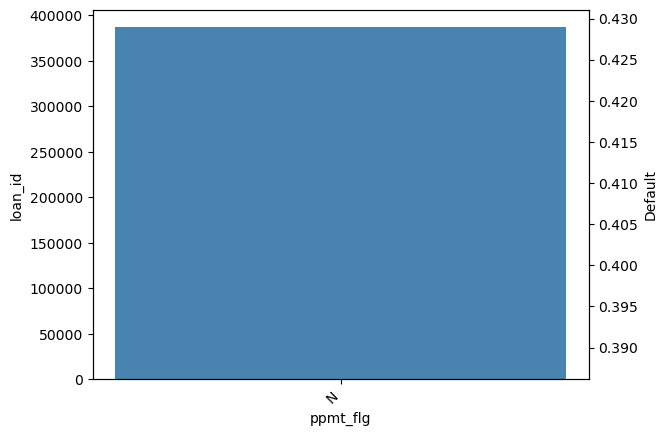

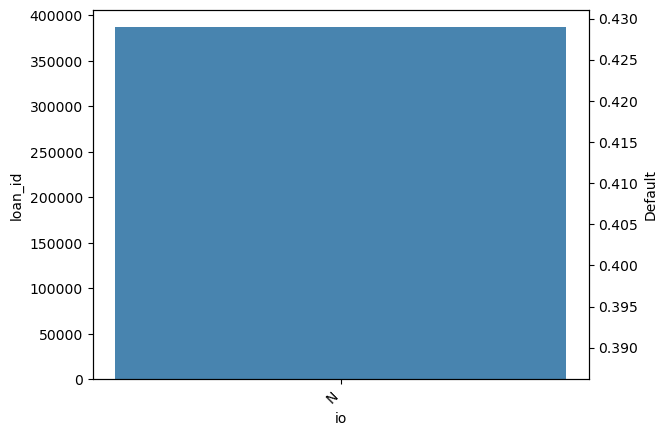

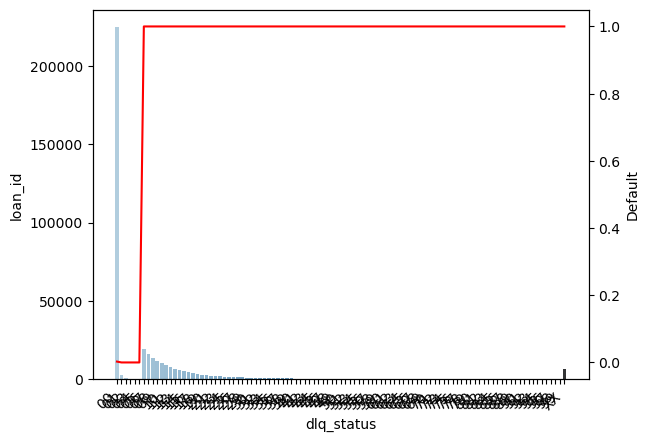

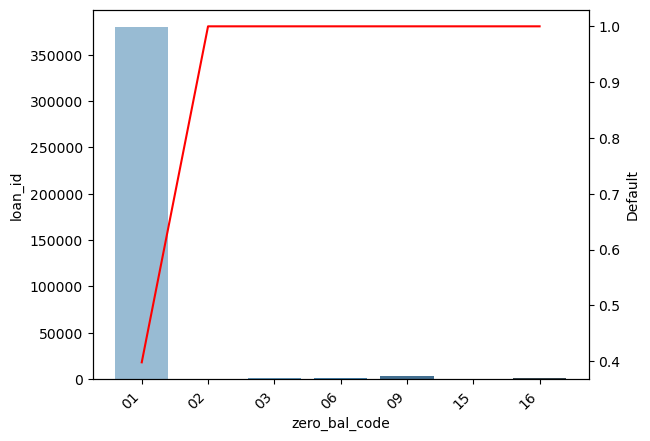

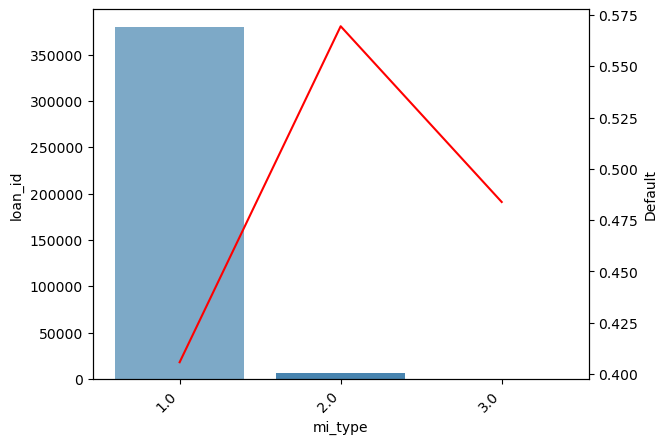

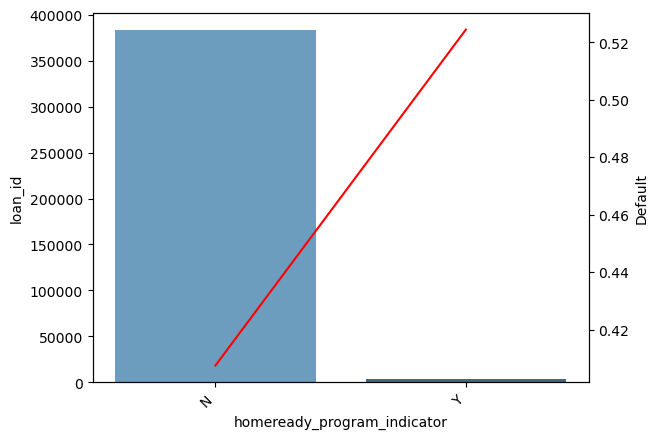

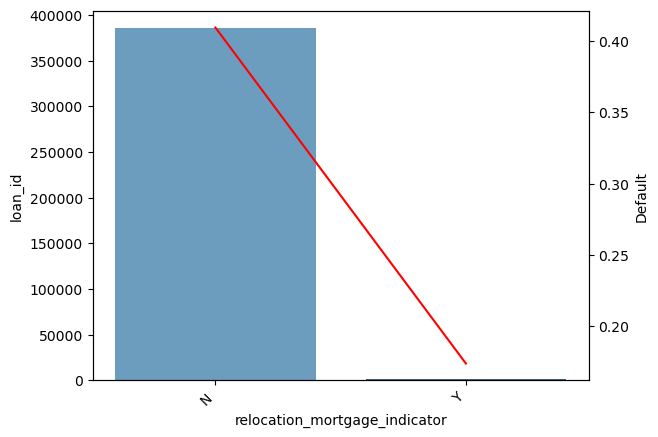

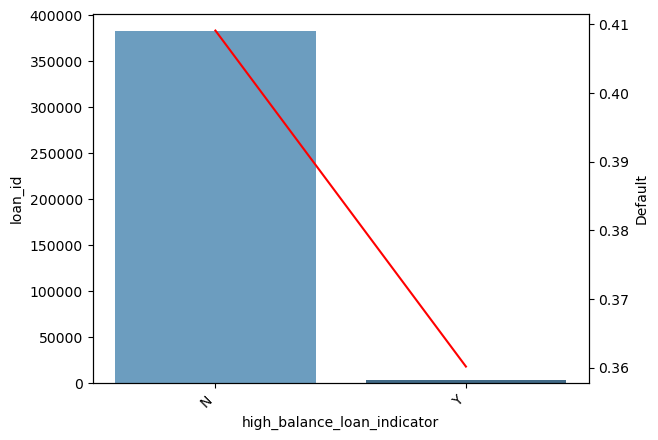

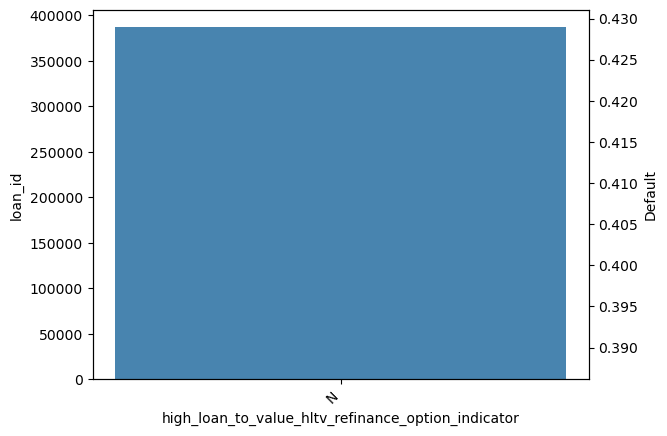

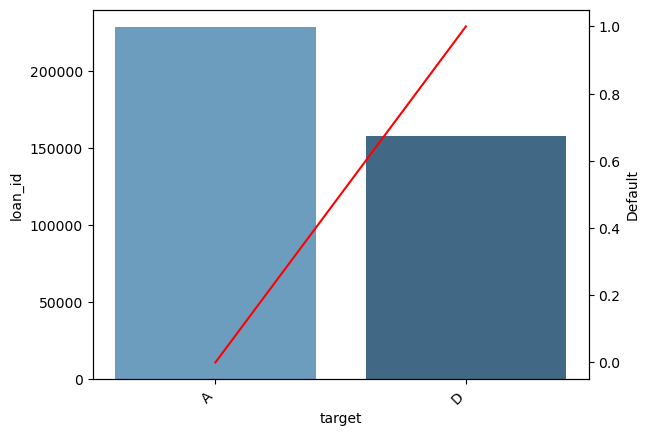

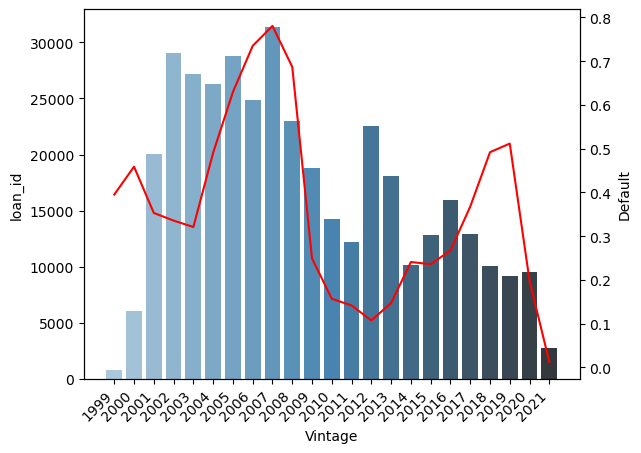

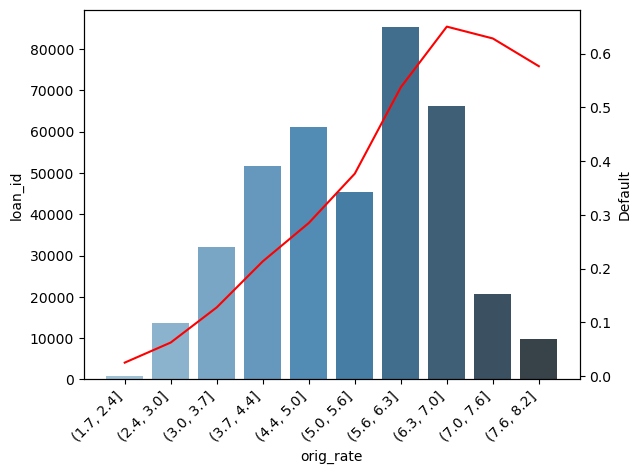

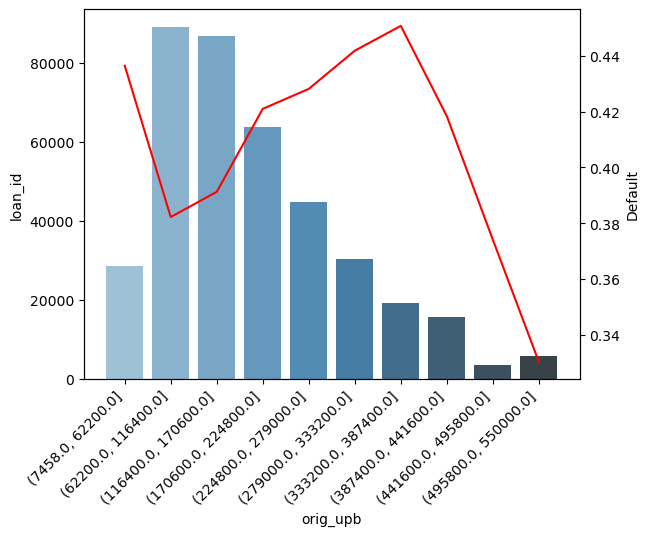

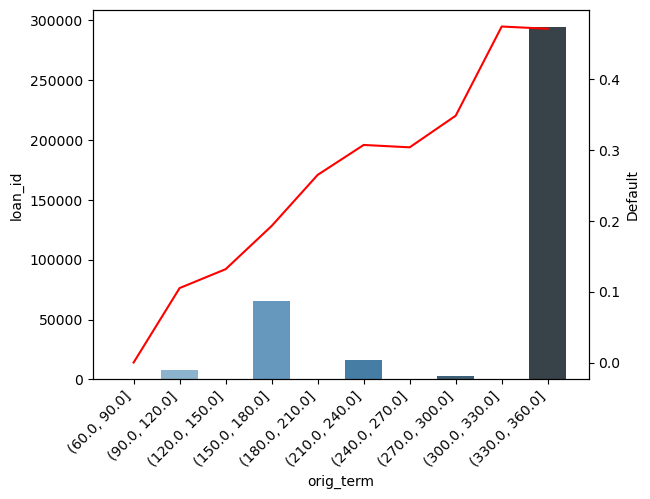

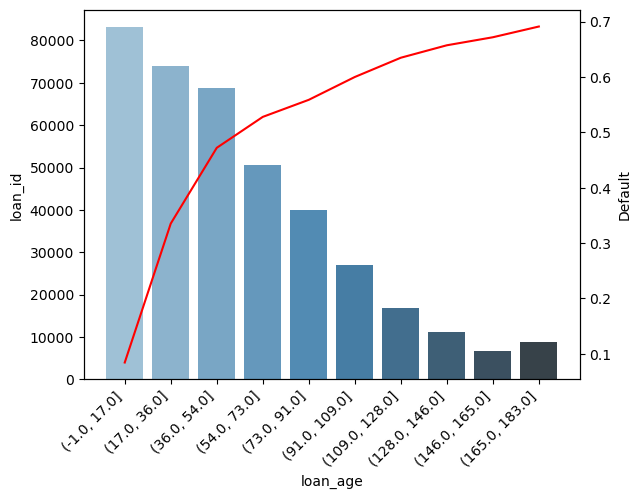

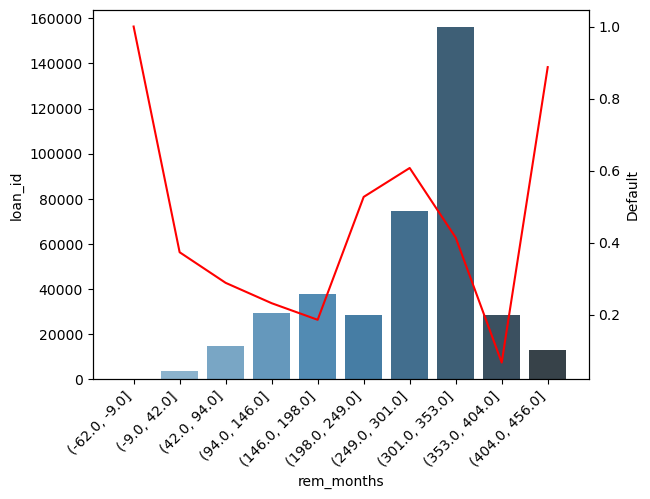

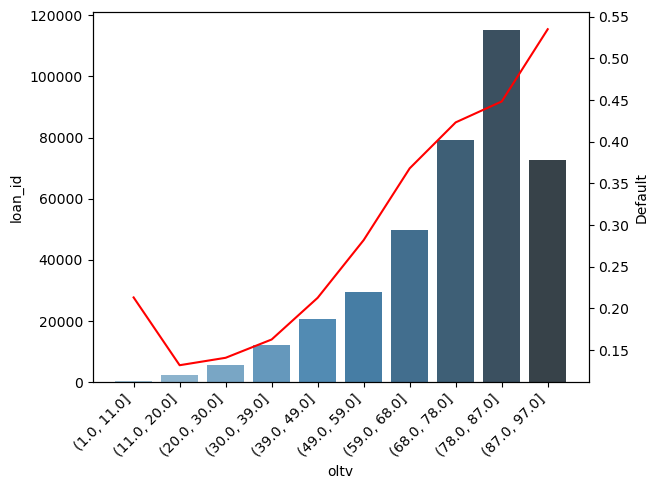

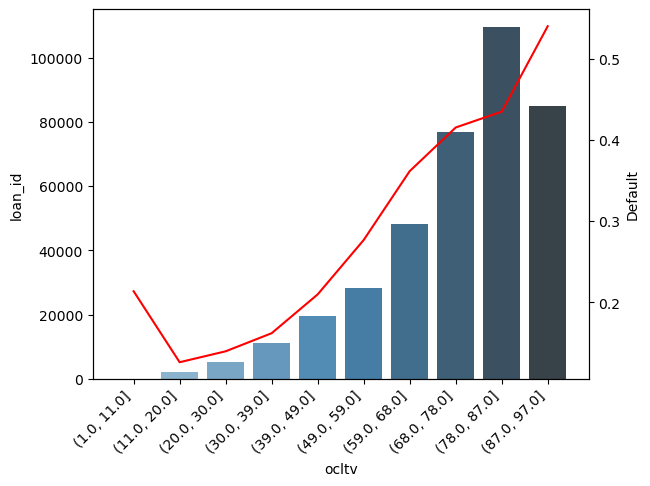

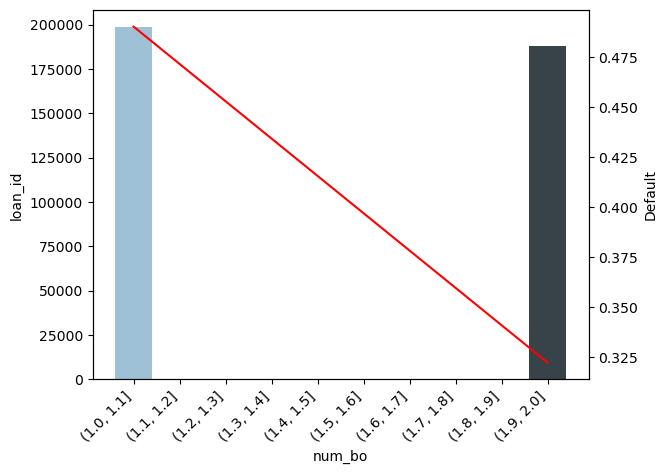

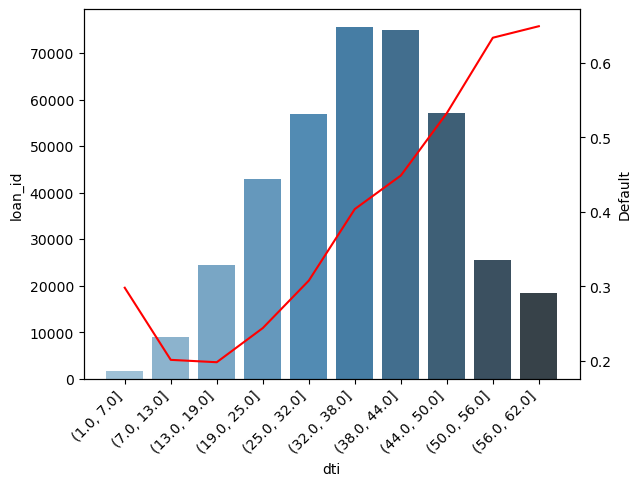

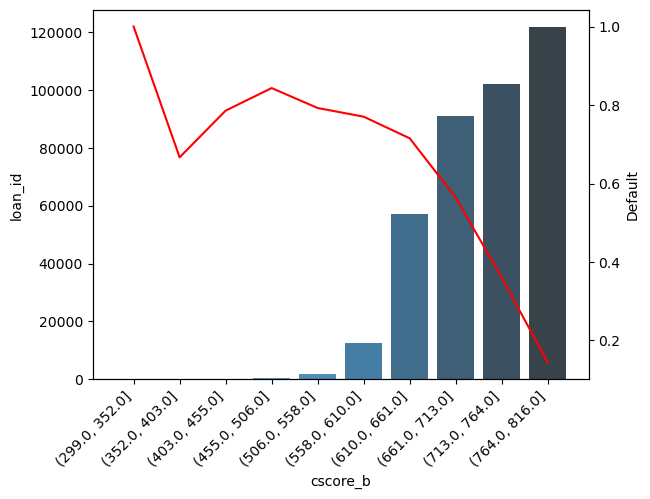

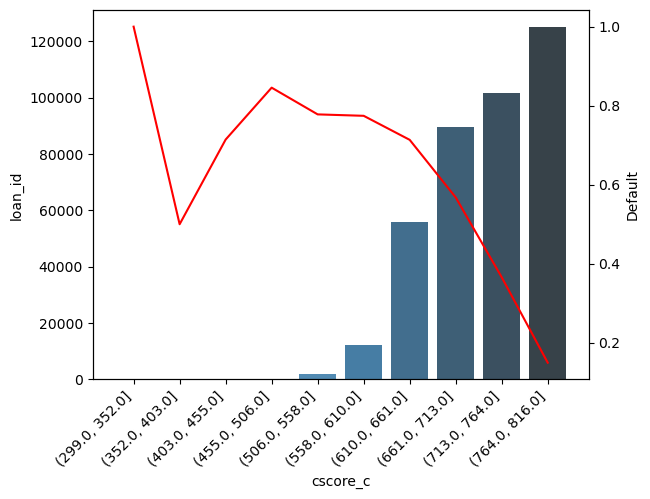

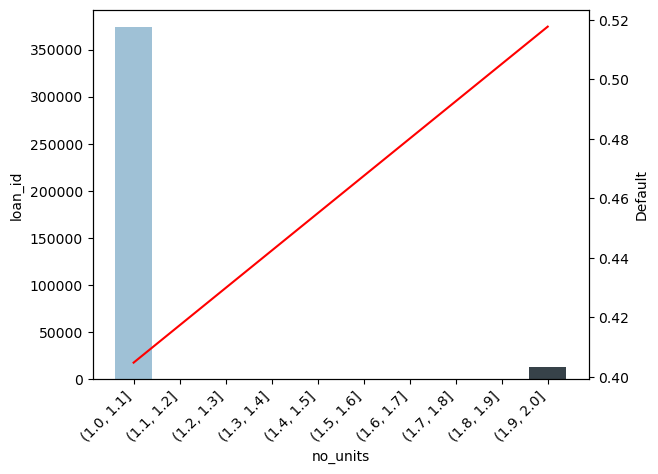

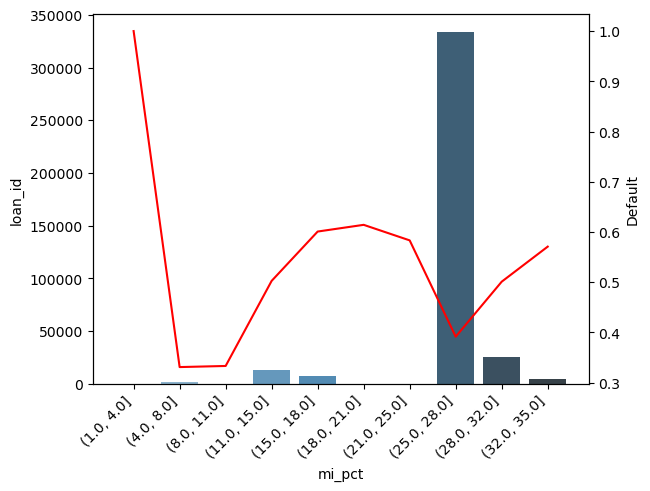

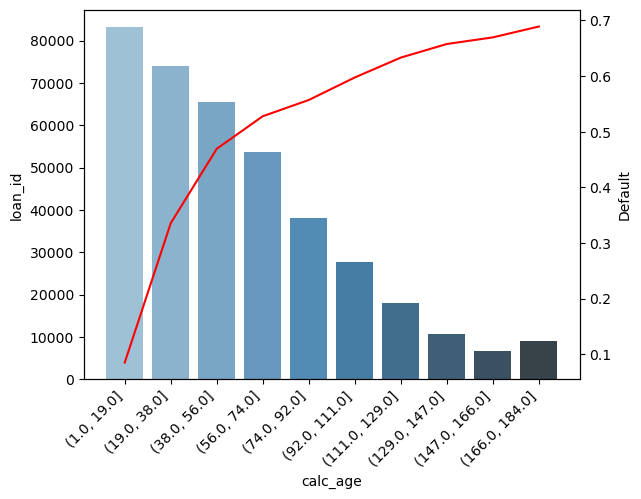

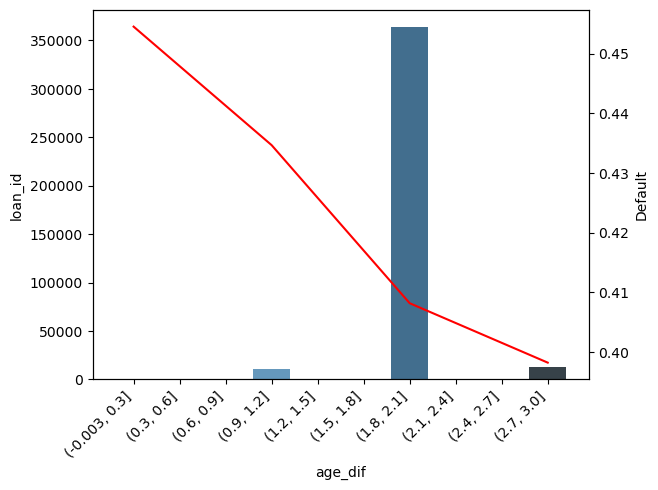

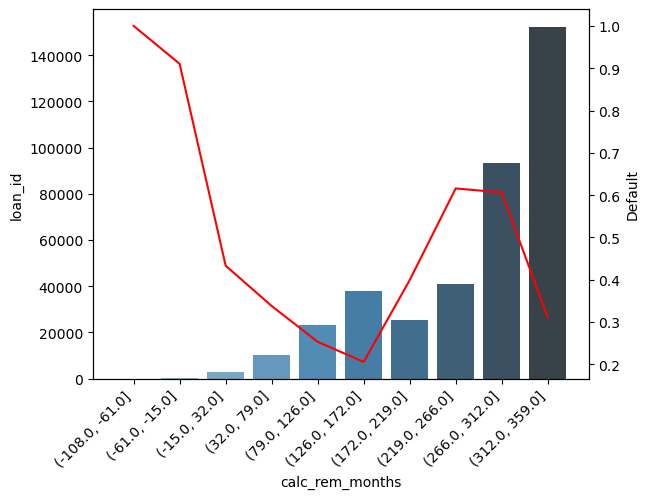

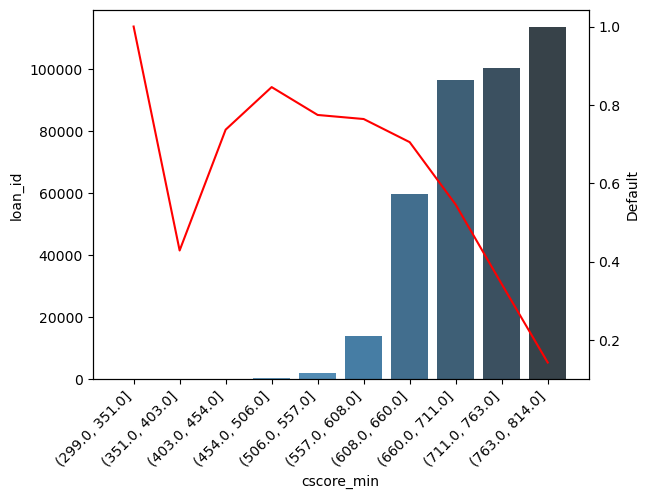

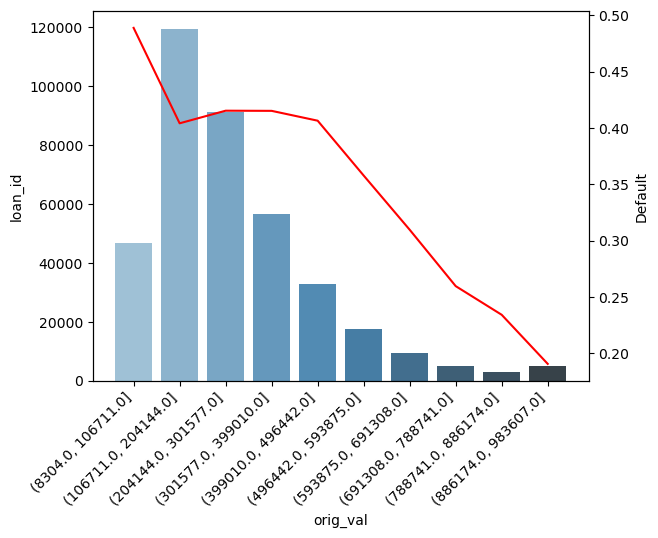

In [72]:
def univariate_plot_V3(df,x_var,y_var,bin_size):
    if x_var in final_num_cols:
        fig,ax=plt.subplots( )
        s=df.groupby([pd.cut(df[x_var],bins=bin_size,precision=0)]).agg({'loan_id':'count',y_var:'mean'})
        sns.barplot (x=x_var, y= 'loan_id', data=s.reset_index(), palette= "Blues_d", ax=ax)
        ax2 = ax.twinx ( )
        sns.lineplot(x=range(len(s.reset_index())),y=y_var,data=s.reset_index(),color='red',markers=True,ax=ax2)
        ax.set_xticklabels(s.index.values, rotation = 45, ha="right")

    elif x_var in final_cat_cols:
        fig,ax=plt.subplots ()
        s=df.groupby (df[x_var]) .agg ( {'loan_id': 'count' ,y_var: 'mean'})
        sns.barplot (x=x_var, y='loan_id', data=s.reset_index(), palette="Blues_d", ax=ax)
        ax2 = ax.twinx ( )
        sns. lineplot (x=range (len(s.reset_index ())), y=y_var, data=s.reset_index(), color='red', markers=True, ax=ax2)
        ax.set_xticklabels (s.index.values, rotation = 45, ha="right")

vars_to_plot = final_cat_cols + final_num_cols
for i in (vars_to_plot):
    univariate_plot_V3(df_sample_dflt,i,'Default',10)

- Let's drop the columns that have only one value since they won't have any predctive power

In [73]:
cols_no_variation=['product','ppmt_flg','high_loan_to_value_hltv_refinance_option_indicator','io']

In [74]:
df_sample.drop(cols_no_variation, inplace= True, axis=1)

In [75]:
vars_to_plot = [x for x in vars_to_plot if x not in cols_no_variation]

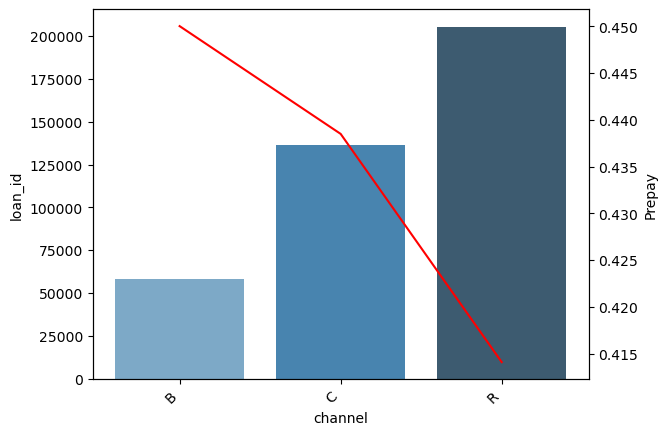

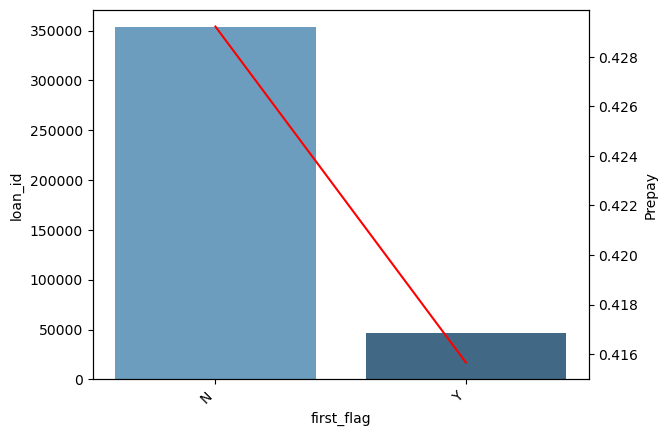

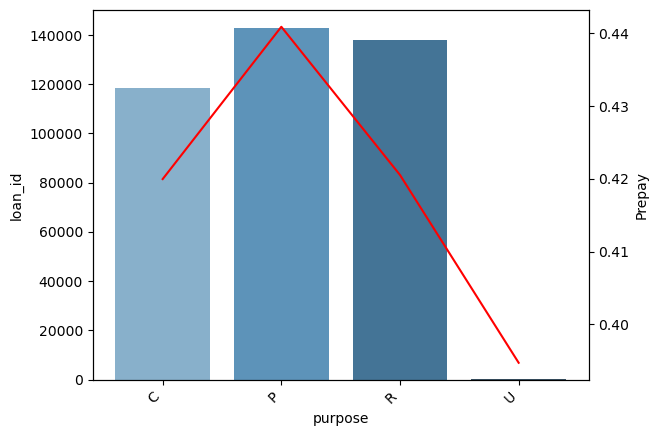

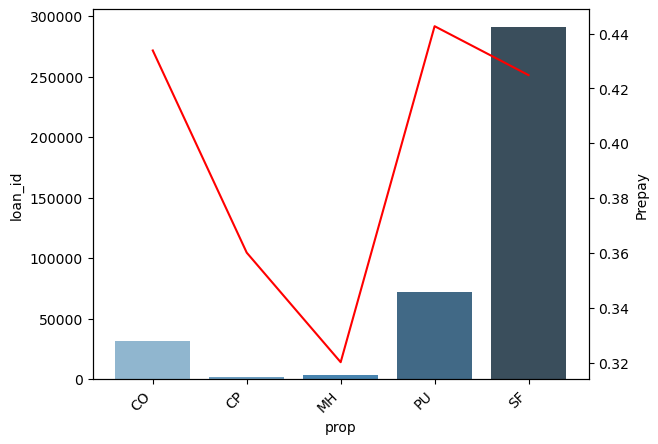

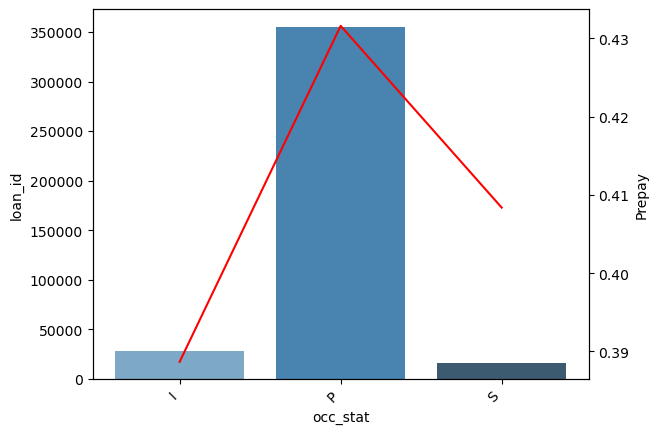

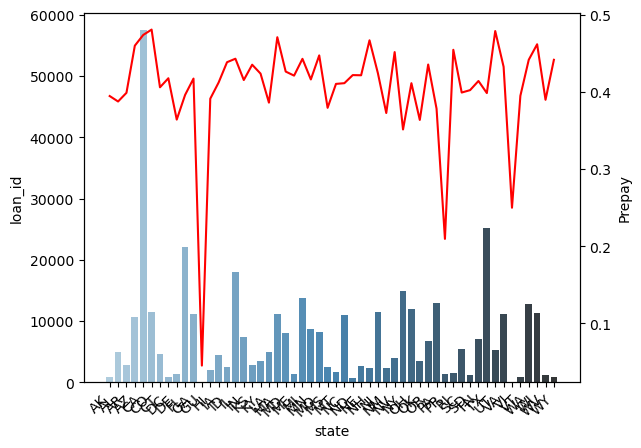

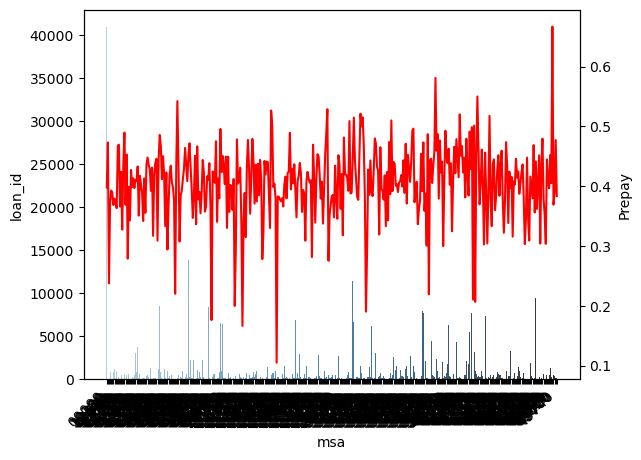

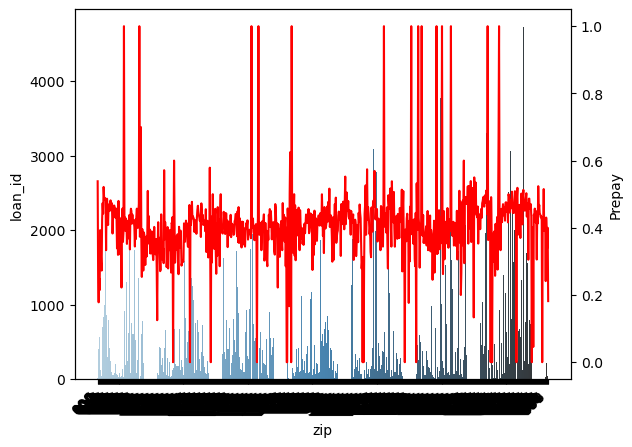

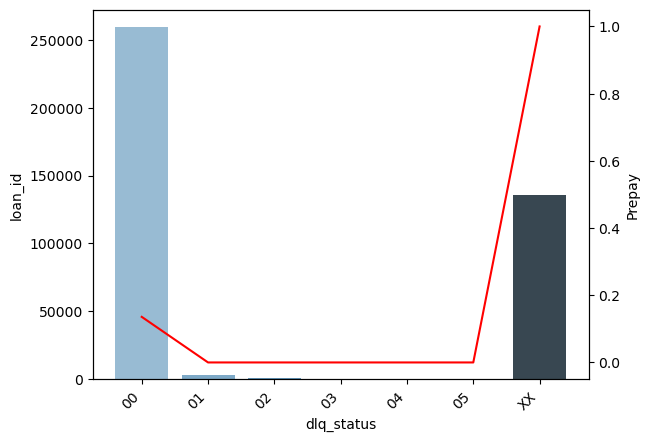

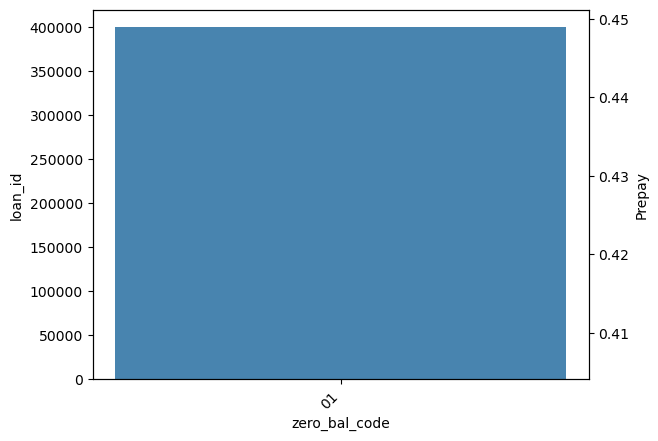

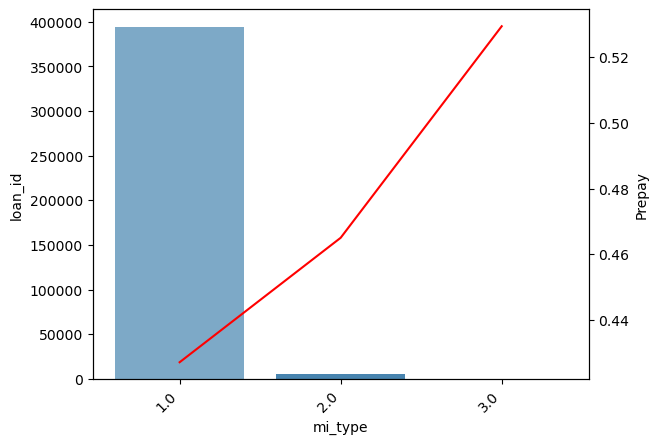

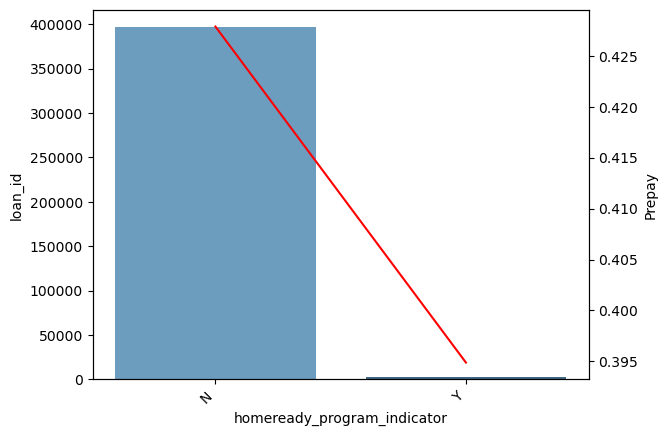

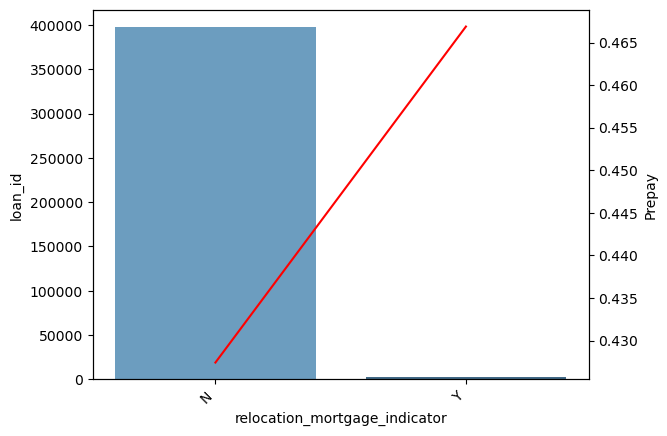

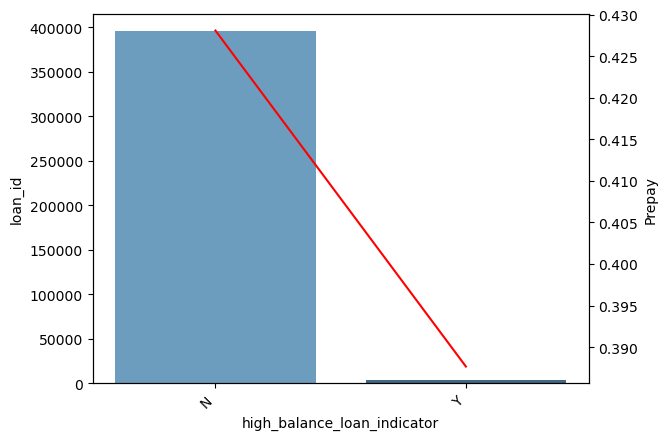

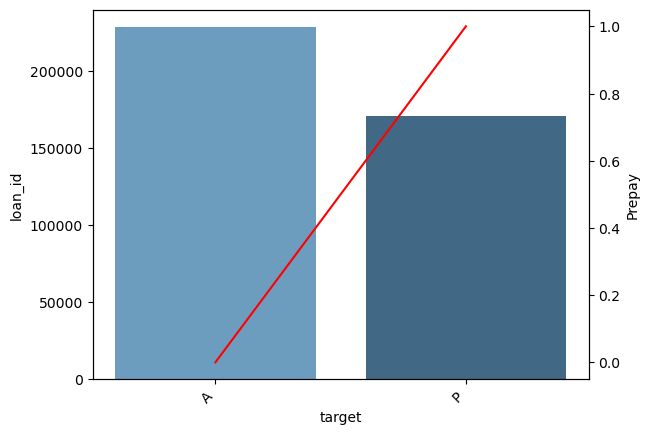

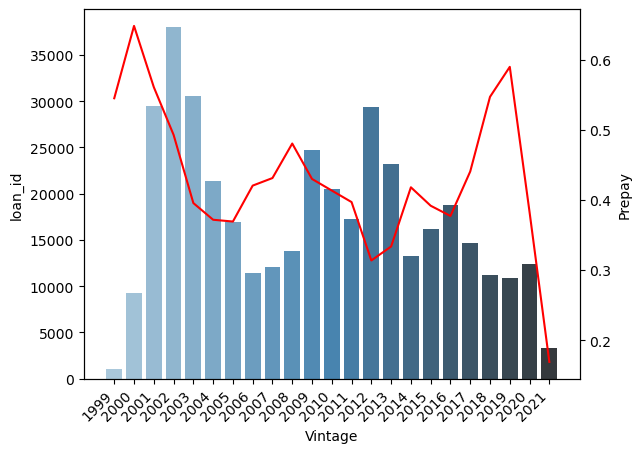

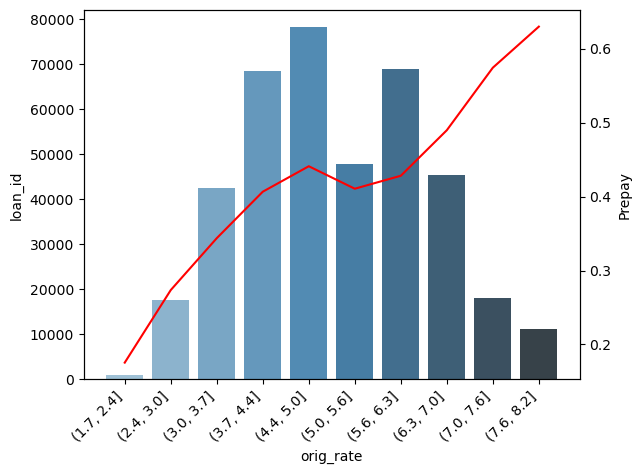

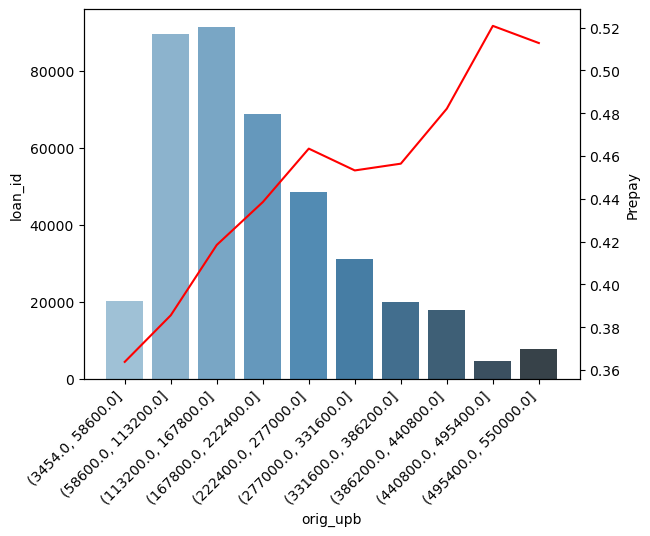

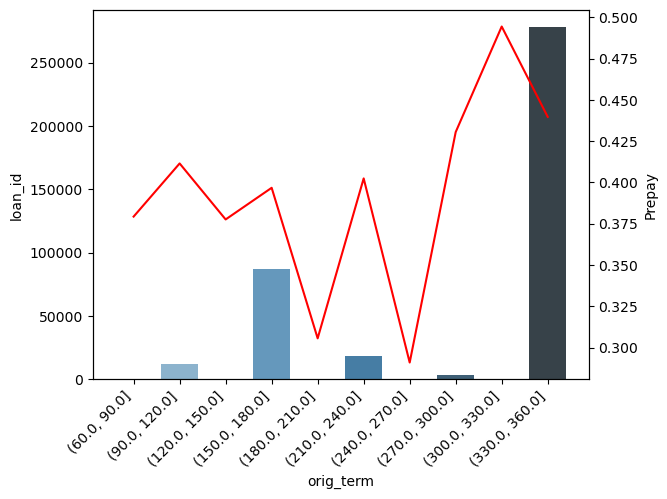

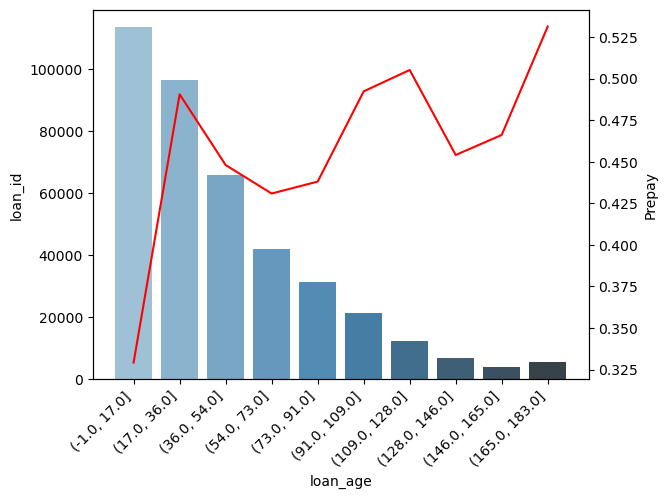

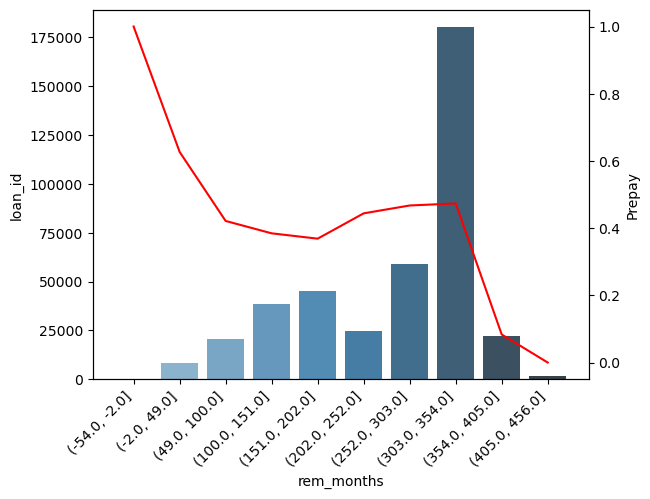

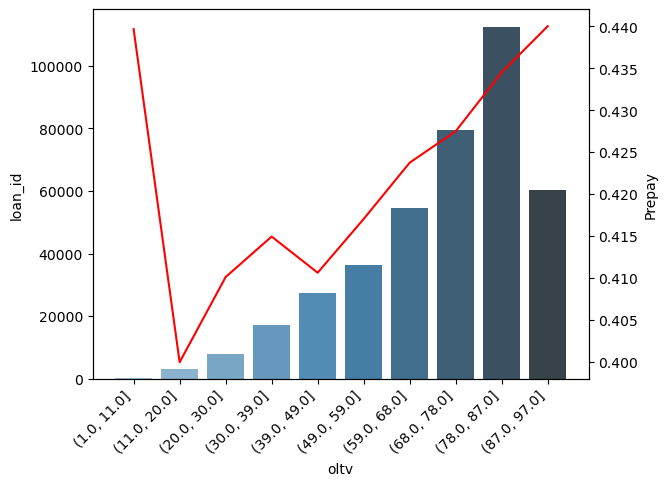

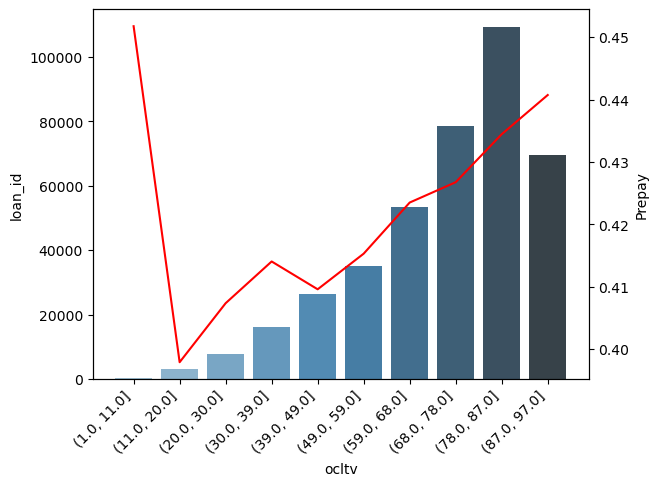

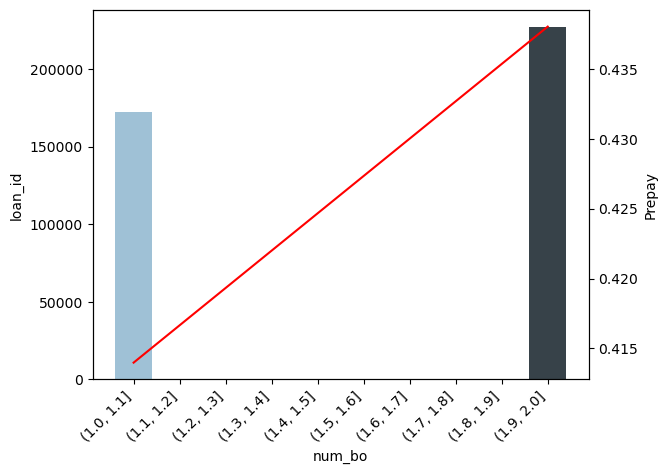

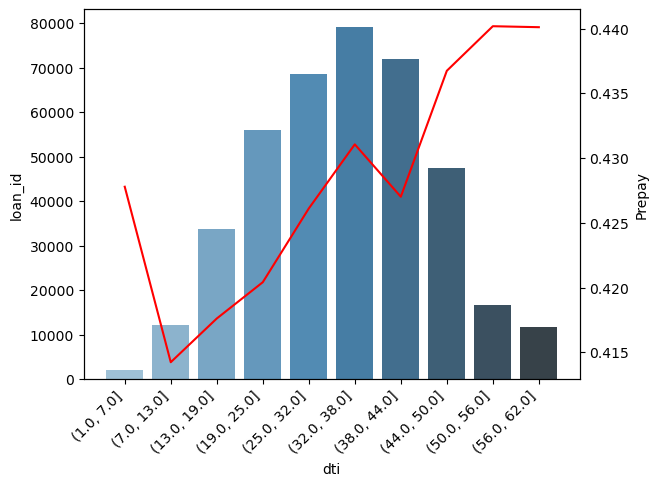

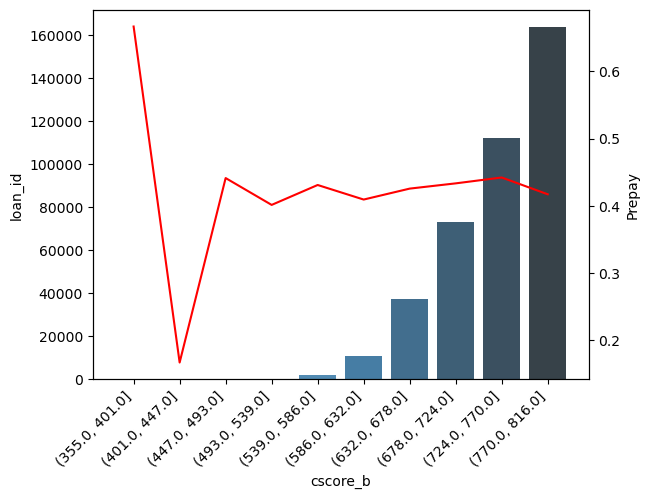

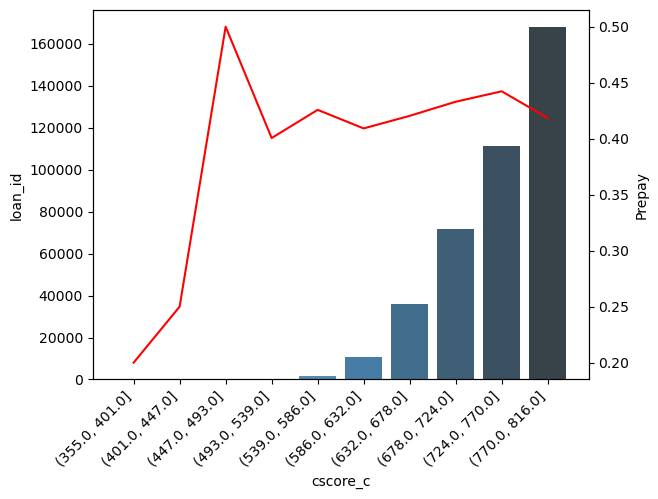

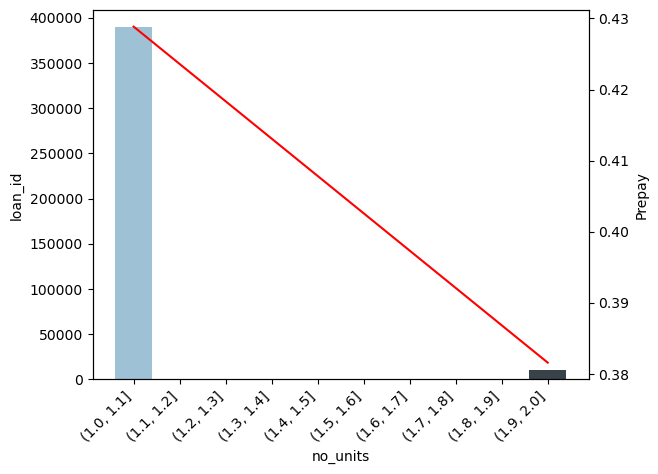

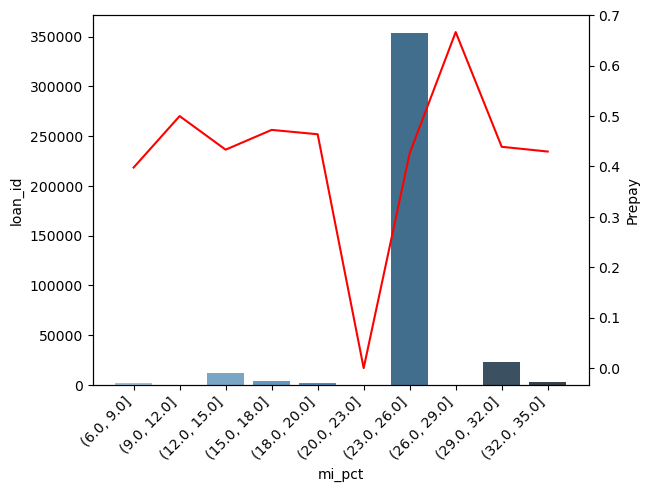

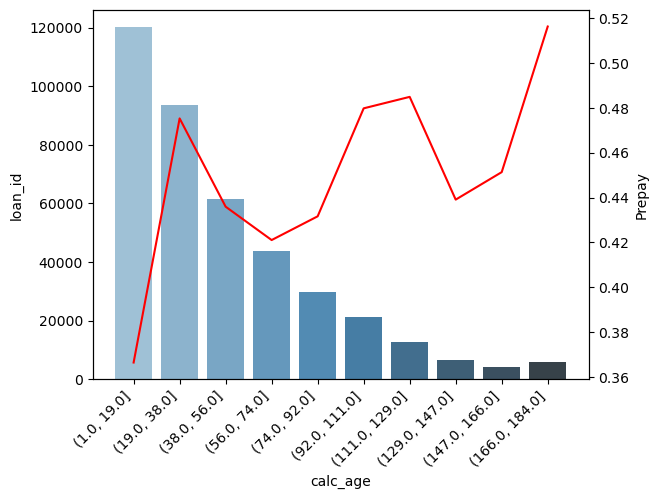

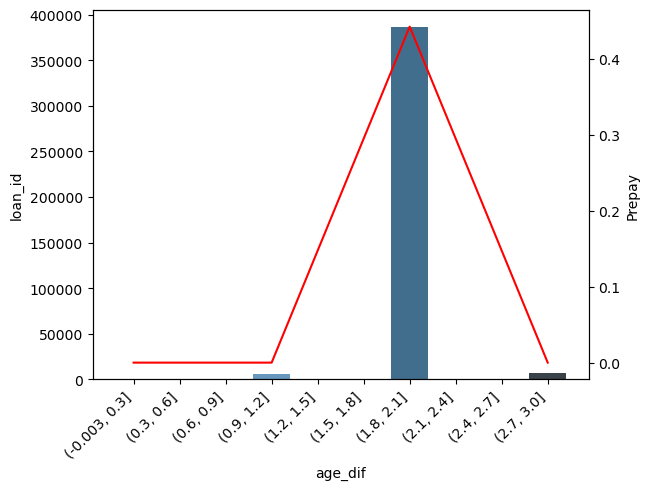

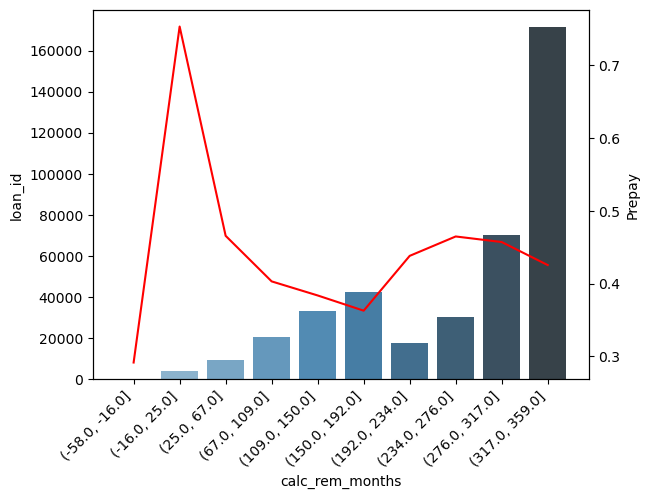

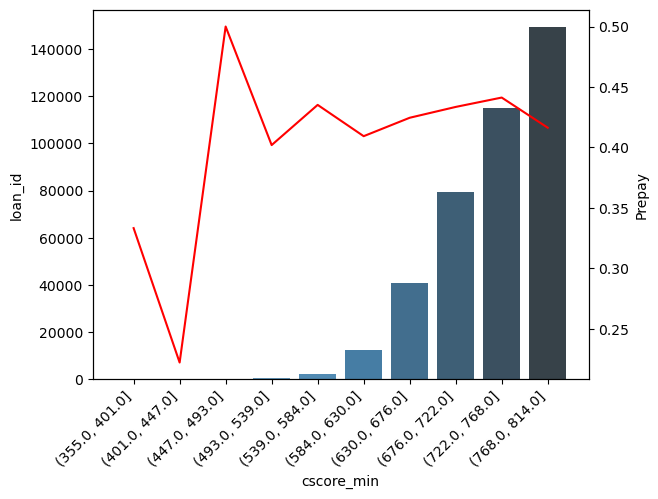

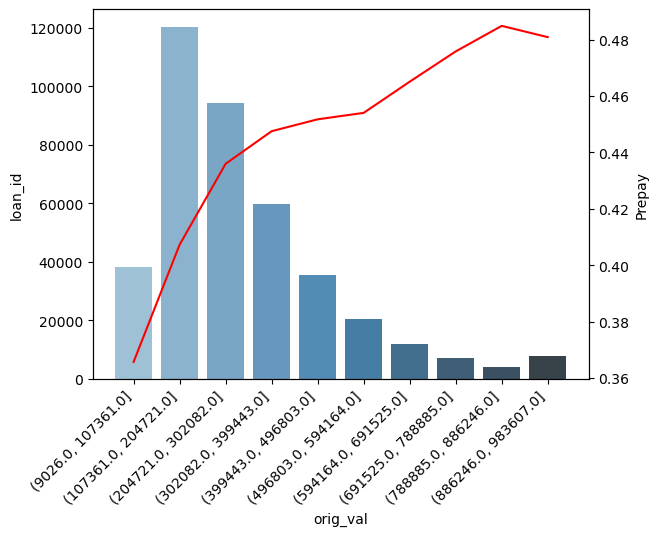

In [76]:

for i in (vars_to_plot):

  univariate_plot_V3(df_sample_ppay,i,'Prepay',10)

In [77]:
def univariate_plot_overlay(df,x_var,y_var_1,y_var_2,bin_size):
   if x_var in final_num_cols:
    s1=df.groupby([pd.cut(df[x_var],bins=10)]).mean([y_var_1,y_var_2])
    p1=sns.lineplot(data=s1,x=s1[x_var],y=y_var_1, label=y_var_1)
    p2=sns.lineplot(data=s1,x=s1[x_var],y=y_var_2, label=y_var_2)
 
   elif x_var in final_cat_cols:
    s1=df.groupby(df[x_var]).mean([y_var_1,y_var_2]) 
    
    fig, ax = plt.subplots()

    s1=s1[[y_var_1,y_var_2]]
    s1[x_var]=s1.index
    print(s1)
    s1.plot.bar(x=x_var, ax=ax)

   plt.xticks(rotation=45)
   plt.show()

In [78]:
df_sample["Prepay"]=df_sample.apply(lambda row : 1 if row['target']=='P' else 0,axis=1)

In [79]:
df_sample["Default"]=df_sample.apply(lambda row : 1 if row['target']=='D' else 0,axis=1)

          Default    Prepay channel
channel                            
B        0.368461  0.284217       B
C        0.307403  0.303709       C
R        0.236647  0.316096       R


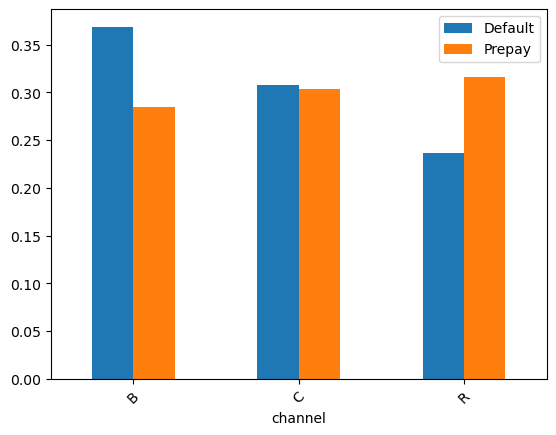

             Default    Prepay first_flag
first_flag                               
N           0.277967  0.309910          N
Y           0.322110  0.281773          Y


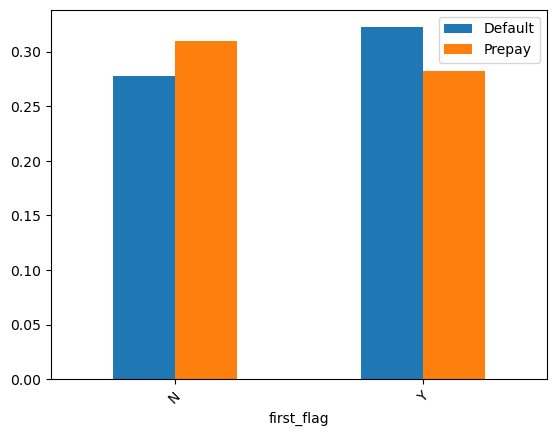

          Default    Prepay purpose
purpose                            
C        0.360573  0.268541       C
P        0.277741  0.318438       P
R        0.207485  0.333280       R
U        0.278481  0.284810       U


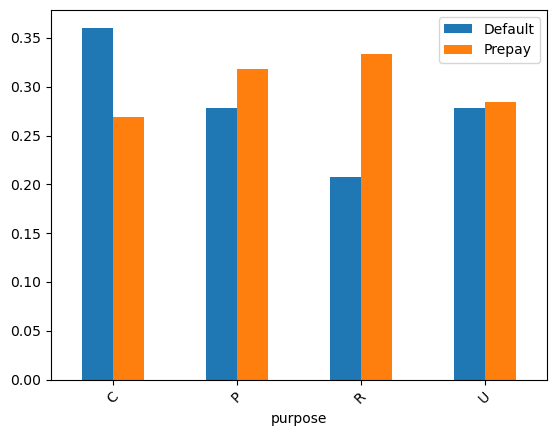

       Default    Prepay prop
prop                         
CO    0.287223  0.309221   CO
CP    0.232403  0.276445   CP
MH    0.418189  0.186310   MH
PU    0.236925  0.337789   PU
SF    0.292189  0.300707   SF


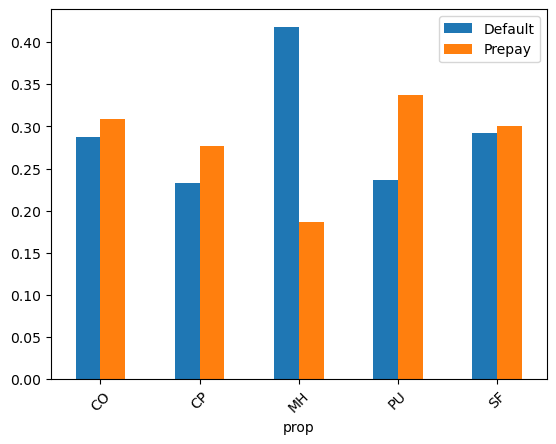

           Default    Prepay occ_stat
occ_stat                             
I         0.312450  0.267230        I
P         0.283755  0.309129        P
S         0.216493  0.319963        S


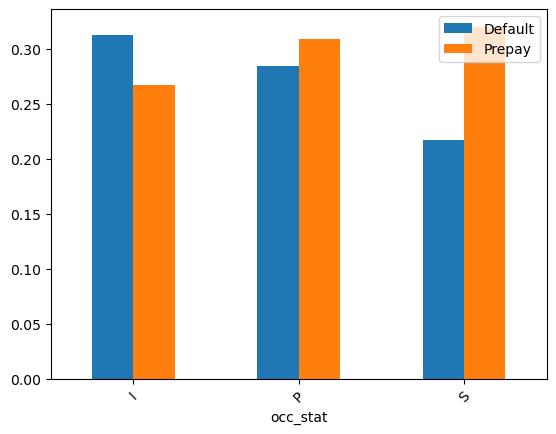

        Default    Prepay state
state                          
AK     0.130719  0.343137    AK
AL     0.242213  0.293771    AL
AR     0.225627  0.308914    AR
AZ     0.259387  0.340696    AZ
CA     0.196747  0.380651    CA
CO     0.141342  0.412894    CO
CT     0.338054  0.268800    CT
DC     0.279805  0.300892    DC
DE     0.301896  0.254254    DE
FL     0.527138  0.187365    FL
GA     0.286825  0.297661    GA
GU     0.185185  0.037037    GU
HI     0.258621  0.290105    HI
IA     0.162920  0.345161    IA
ID     0.215740  0.343968    ID
IL     0.331545  0.296193    IL
IN     0.319931  0.282555    IN
KS     0.228325  0.335935    KS
KY     0.295386  0.298610    KY
LA     0.308348  0.267096    LA
MA     0.245030  0.355578    MA
MD     0.319922  0.290022    MD
ME     0.370552  0.265125    ME
MI     0.242300  0.335633    MI
MN     0.196313  0.334538    MN
MO     0.172140  0.370393    MO
MS     0.282346  0.272325    MS
MT     0.146857  0.350196    MT
NC     0.239047  0.313060    NC
ND     0

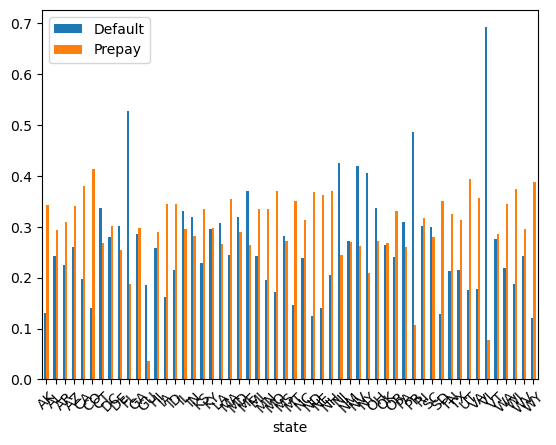

        Default    Prepay    msa
msa                             
00000  0.251539  0.297864  00000
10180  0.184211  0.385965  10180
10380  0.421801  0.137441  10380
10420  0.372333  0.233310  10420
10500  0.363636  0.250000  10500
...         ...       ...    ...
49500  0.666667  0.222222  49500
49620  0.323887  0.249663  49620
49660  0.428208  0.222363  49660
49700  0.325342  0.321918  49700
49740  0.346008  0.250951  49740

[409 rows x 3 columns]


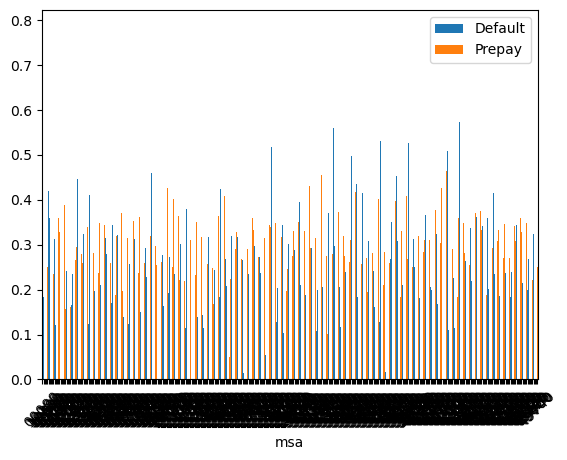

      Default    Prepay  zip
zip                         
000  0.187500  0.437500  000
004  1.000000  0.000000  004
006  0.428999  0.134529  006
007  0.513839  0.086643  007
008  0.694118  0.076471  008
..        ...       ...  ...
995  0.138249  0.370968  995
996  0.161417  0.318898  996
997  0.086207  0.310345  997
998  0.081633  0.367347  998
999  0.000000  0.181818  999

[914 rows x 3 columns]


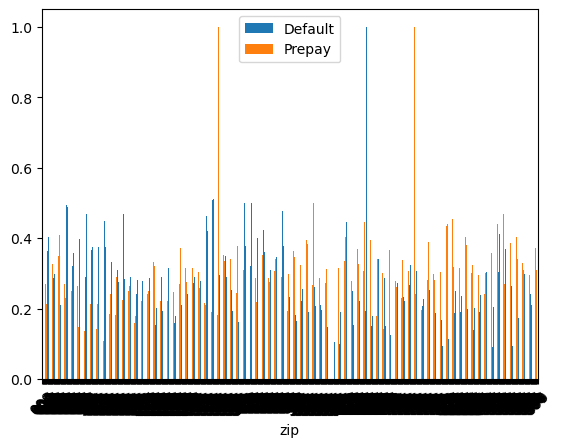

             Default    Prepay dlq_status
dlq_status                               
00          0.002209  0.135381         00
01          0.000000  0.000000         01
02          0.000000  0.000000         02
03          0.000000  0.000000         03
04          0.000000  0.000000         04
...              ...       ...        ...
96          1.000000  0.000000         96
97          1.000000  0.000000         97
98          1.000000  0.000000         98
99          1.000000  0.000000         99
XX          0.044752  0.955248         XX

[101 rows x 3 columns]


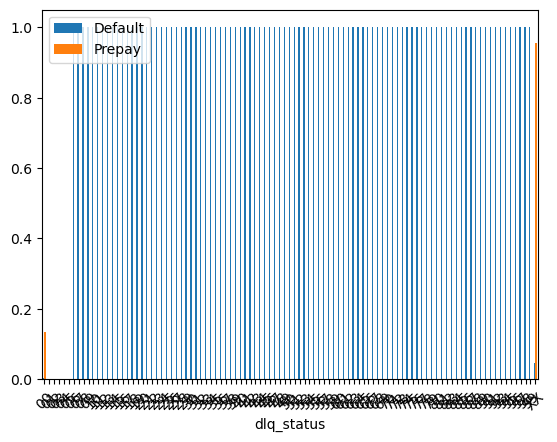

                Default    Prepay zero_bal_code
zero_bal_code                                  
01             0.274342  0.310325            01
02             1.000000  0.000000            02
03             1.000000  0.000000            03
06             1.000000  0.000000            06
09             1.000000  0.000000            09
15             1.000000  0.000000            15
16             1.000000  0.000000            16


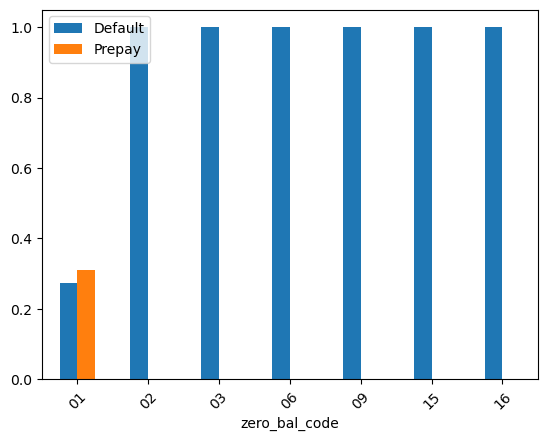

          Default    Prepay mi_type
mi_type                            
1.0      0.281174  0.307028     1.0
2.0      0.414481  0.272274     2.0
3.0      0.306122  0.367347     3.0


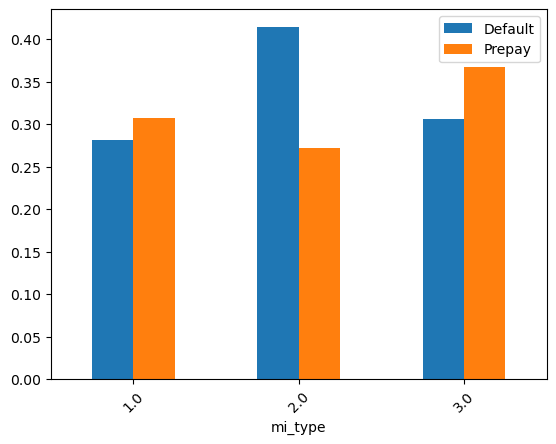

                              Default    Prepay homeready_program_indicator
homeready_program_indicator                                                
N                            0.282349  0.307074                           N
Y                            0.400205  0.236847                           Y


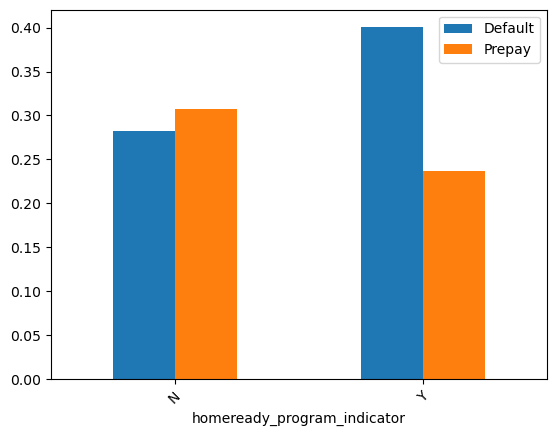

                                Default    Prepay  \
relocation_mortgage_indicator                       
N                              0.284193  0.305955   
Y                              0.100891  0.419773   

                              relocation_mortgage_indicator  
relocation_mortgage_indicator                                
N                                                         N  
Y                                                         Y  


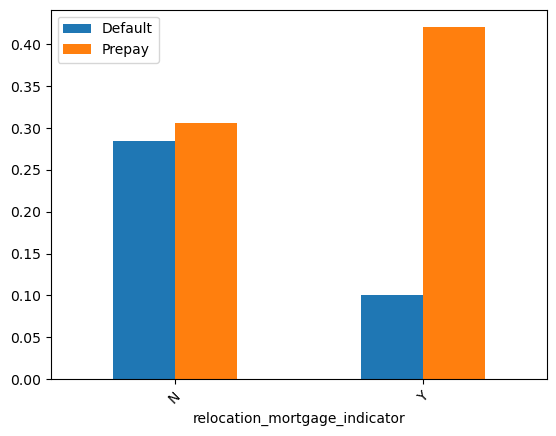

                              Default    Prepay high_balance_loan_indicator
high_balance_loan_indicator                                                
N                            0.283661  0.306646                           N
Y                            0.256325  0.288299                           Y


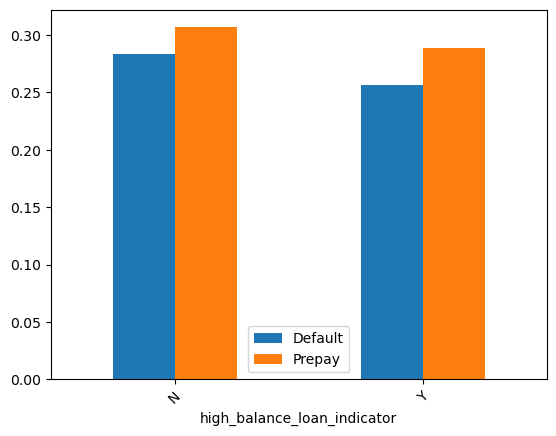

        Default  Prepay target
target                        
A           0.0     0.0      A
D           1.0     0.0      D
P           0.0     1.0      P


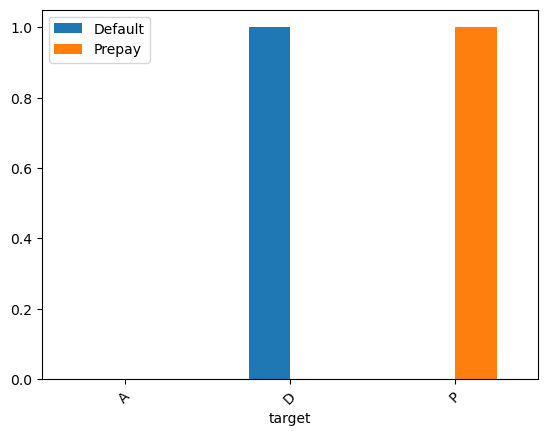

          Default    Prepay  Vintage
Vintage                             
1999     0.229151  0.419985     1999
2000     0.229882  0.498955     2000
2001     0.193412  0.452262     2001
2002     0.203983  0.392235     2002
2003     0.222228  0.307602     2003
2004     0.376897  0.231613     2004
2005     0.517303  0.178193     2005
2006     0.616466  0.161222     2006
2007     0.669297  0.142576     2007
2008     0.532852  0.224378     2008
2009     0.159123  0.361435     2009
2010     0.098459  0.372623     2010
2011     0.090517  0.360965     2011
2012     0.076310  0.289746     2012
2013     0.103203  0.299203     2013
2014     0.155940  0.352773     2014
2015     0.158169  0.329736     2015
2016     0.185031  0.307341     2016
2017     0.245411  0.332388     2017
2018     0.304955  0.380082     2018
2019     0.300714  0.412276     2019
2020     0.132205  0.332023     2020
2021     0.010479  0.167365     2021


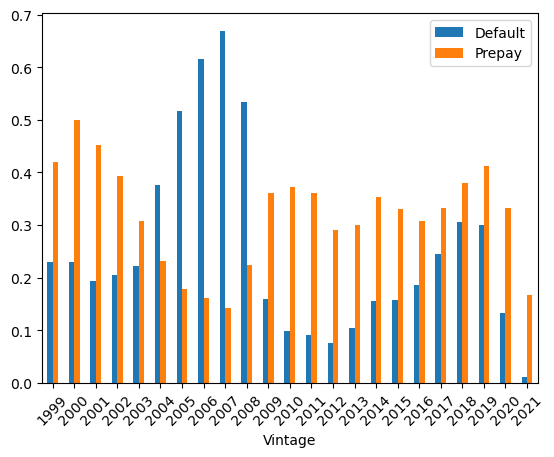

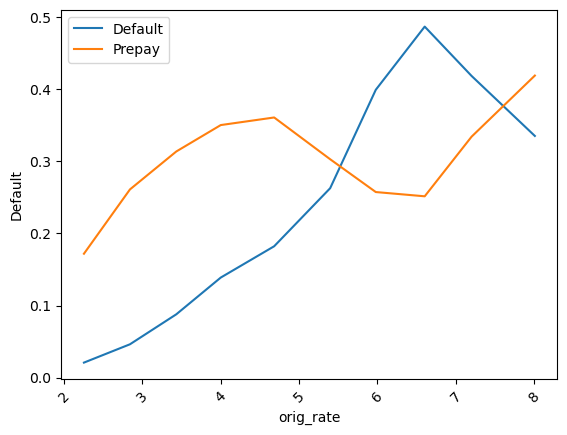

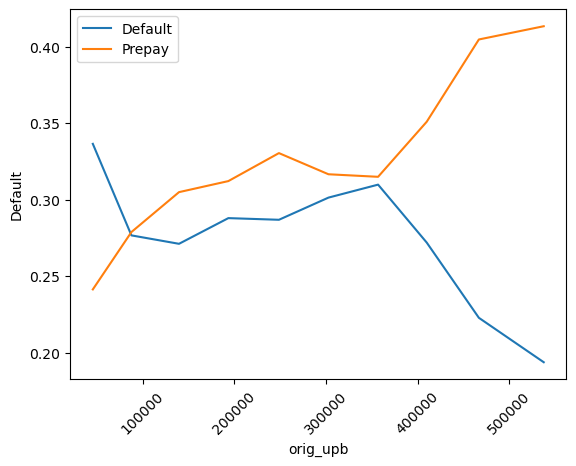

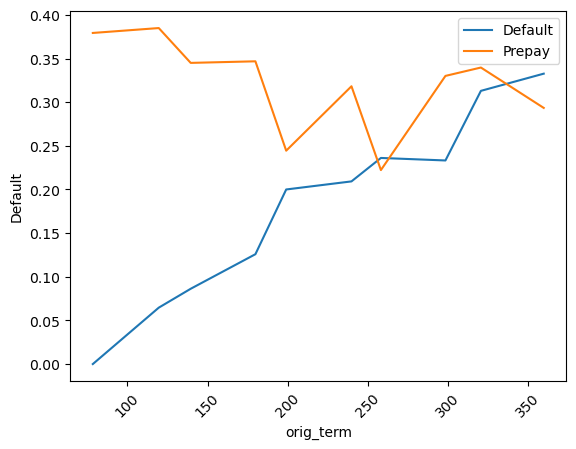

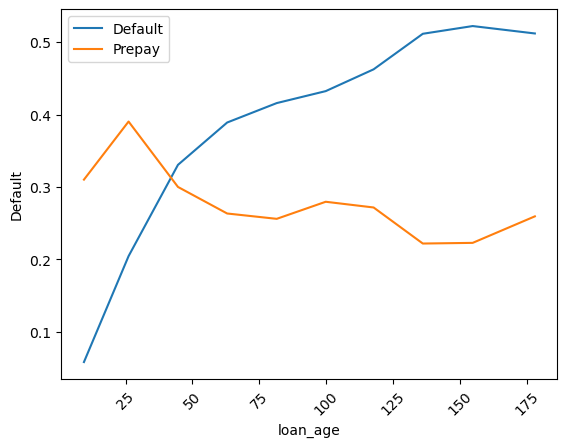

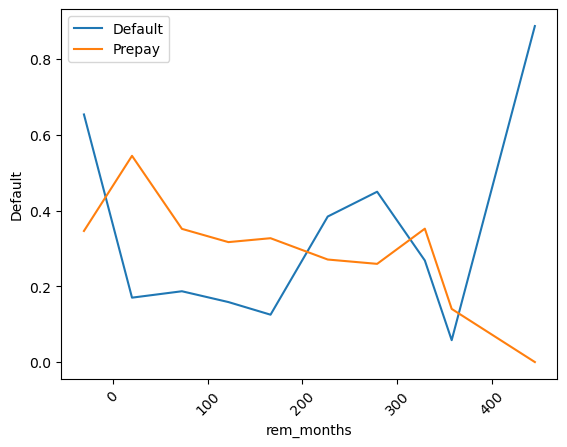

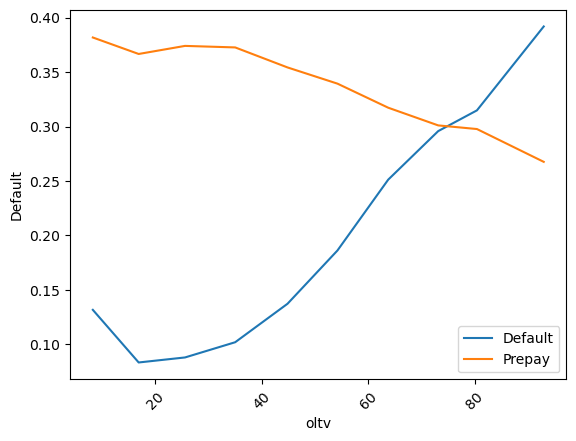

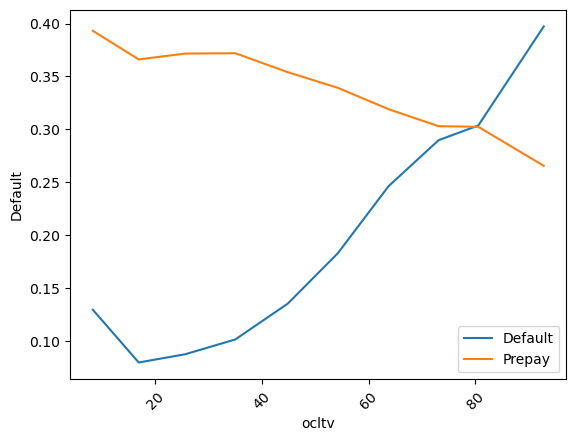

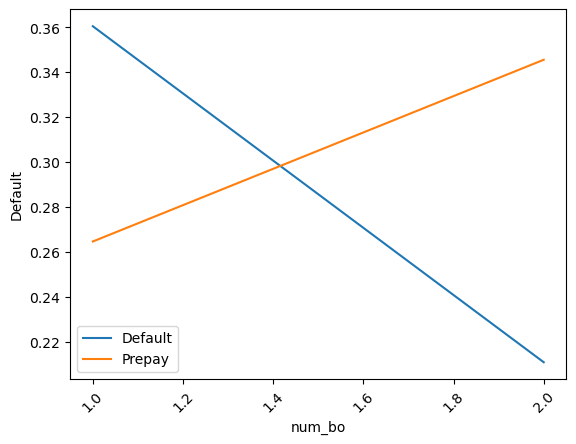

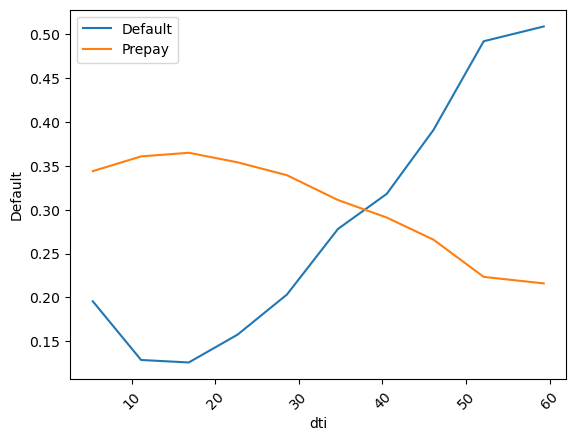

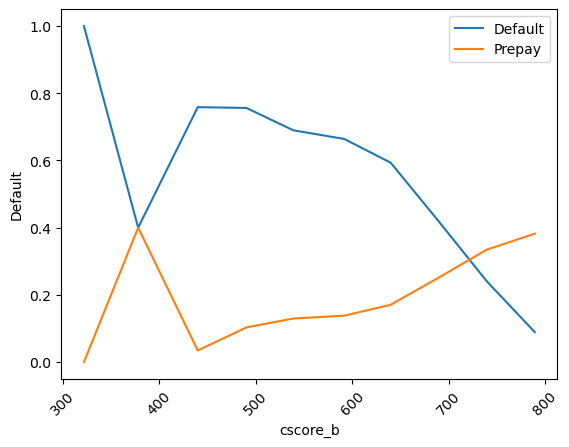

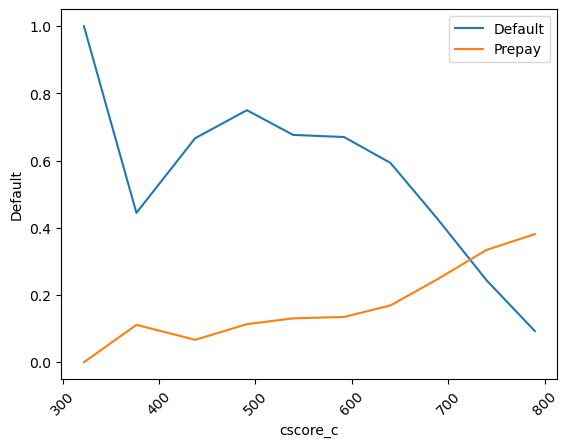

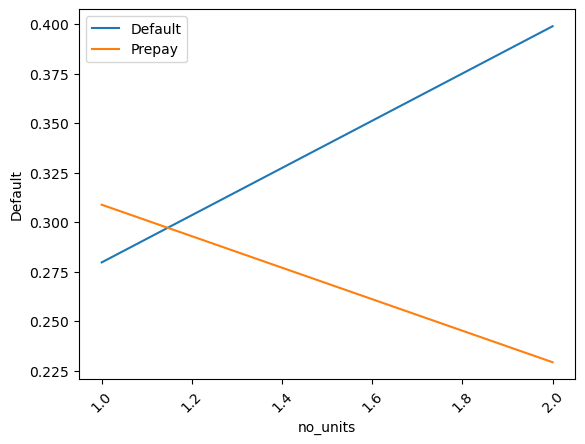

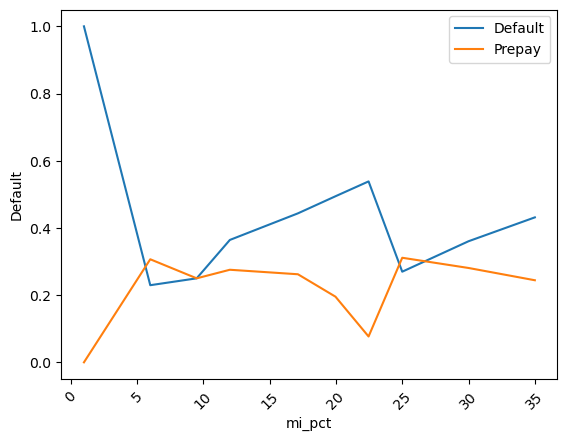

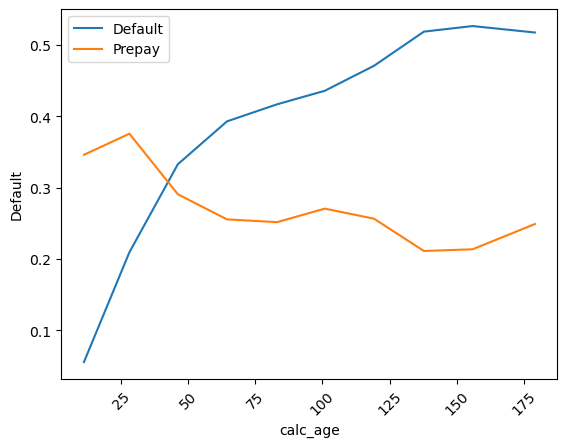

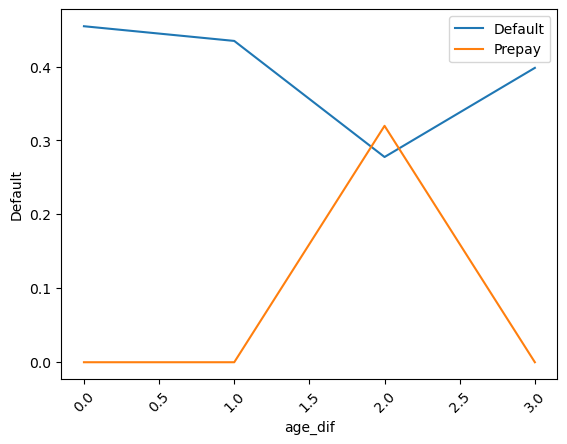

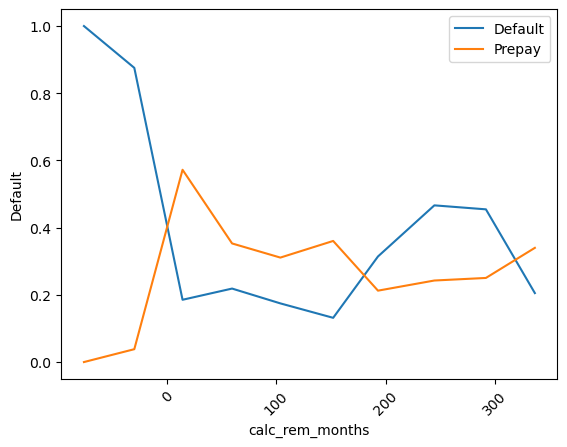

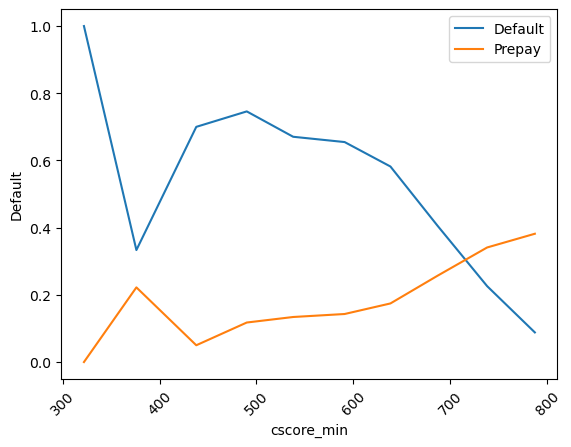

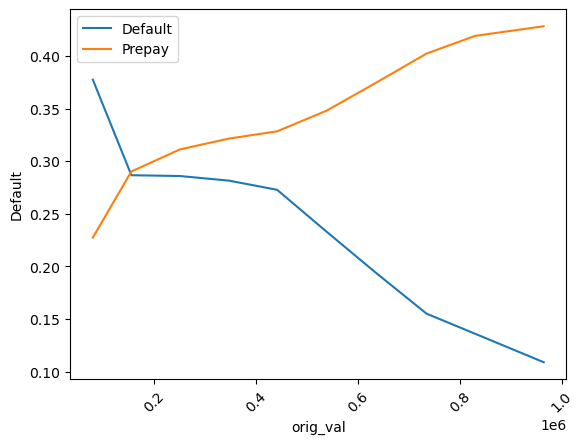

In [80]:
for i in (vars_to_plot):

  univariate_plot_overlay(df_sample,i,'Default','Prepay',10)

## Saving

In [81]:
file_path ='cleaned_data_part1.csv'
df_sample.to_csv(file_path, index= False)

## Conclusion

As observed in the graphs, the red line representing the default rate is prominently featured. Particularly in the 'Vintage' column, we can glean valuable insights over the years, specifically between 1999 and 2021. Within this time frame, the bars representing prepayment rates and the red default rate line are noteworthy.

One significant finding pertains to the period between 2006 and 2008, corresponding to the economic recession. During this phase, as the default rate increases, prepayment rates exhibit a decreasing trend. This observation provides substantial information to initiate the project.

Furthermore, by analyzing these graphs, we can discern the relationship between default and prepayment rates for each column.   
- Based on what we've discussed so far, it seems like we have enough information to work on this data and build a model. In Mortgage Default Model Project - 2, after making the data more comprehensible and designing the model, I will add a green prediction line alongside the red default rate line and interpret the model.